In [58]:
import os
import numpy as np
import pandas as pd

url = "https://nft-capstone.s3.us-west-1.amazonaws.com/df_all_values.pkl.gz"
df_all_values = pd.read_pickle(url)

In [59]:
!pip install imblearn -q

In [2]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

# standard imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.metrics import *

# pipelines
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

# data preparation
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

# machine learning
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor
import lightgbm as lgb
from catboost import CatBoostClassifier

### Predict whether secondary sales of NFTs will be higher or lower

In [566]:
df_all_values['First_item_Unique_id_collection'].value_counts()

1    4678242
0    1392785
Name: First_item_Unique_id_collection, dtype: int64

In [62]:
df_collection_nft_second = df_all_values[(df_all_values['First_item_Collection_cleaned'] == 0) & (df_all_values['First_item_Unique_id_collection'] == 0)]
df_collection_nft_second.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,pca_2,pca_3,pca_4,pca_5,trans_count_seller,deg_centrality_seller,pgrank_seller,trans_count_buyer,deg_centrality_buyer,pgrank_buyer
27,0x5f4becdcfcbeaf8274b6905b101aaf44ac10012c,23,0x3f5fb3c302839bff08c5b9efac7011d92c2a26a7338a...,0x425a2ca37c24b96a3935e78f54c31d8aac78208f,jfcBishop,0x2b706e5955ade3033613b33a207f0a4ecf182f1d,lokh,https://lh3.googleusercontent.com/NW1g3yh7wWAj...,https://ipfs.io/ipfs/QmVGvA4ekoduGrfeJGj6X3nhn...,https://lh3.googleusercontent.com/NW1g3yh7wWAj...,...,NaN,NaN,NaN,NaN,1,0.000435,1.579783e-05,1,0.000030,9.367911e-07
153,0xef547d017f64863a1a741864d900956081744238,67,0x84b1a8609b844305da45d487c0d86f8c4ada65f253f6...,0xb88555545e36ad0eee39e401e5f47cfa7d580df1,cmodgli,0xb0f18ebfbe9c496a2ccd6181e48f0efd5d71c526,CryptoCafe,https://lh3.googleusercontent.com/AHu4hho7-a6H...,NaN,https://lh3.googleusercontent.com/AHu4hho7-a6H...,...,3.365610,14.981804,-14.954402,0.377541,1,0.000032,3.119297e-06,1,0.000062,7.669013e-07
162,0x8ae8d2ae74a96595bcdab803b563f594009e3db2,18,0xd3eda59a3571b24aa8318616249e9cfa5d81161e623a...,0x61592a6f682bbabfd743aa7596ee269e7448212c,AceKennedy,0x3718e88d4b854785b00171848b5d94f24d241a00,Zich,https://lh3.googleusercontent.com/sqP3FLVmlLr6...,http://www.aicryptoart.org/artpieces/18_Specia...,https://lh3.googleusercontent.com/sqP3FLVmlLr6...,...,2.565265,25.302385,-15.823856,-1.457436,1,0.002481,6.280137e-05,1,0.000039,1.200706e-06
174,0x495f947276749ce646f68ac8c248420045cb7b5e,8158188965530611213478792180170814122882320388...,0x94594a4b6c99370aa3280e2e8423874a8f5a3d24c39e...,0xb45db694f10f48c3fed0cf9e185a580033828eba,AirbrushStudio,0x954b606c88bfdc215d4032cbb19c488e69370295,Hajj,https://lh3.googleusercontent.com/af7I-pVcQkEY...,NaN,https://lh3.googleusercontent.com/af7I-pVcQkEY...,...,7.808609,17.904716,-3.303177,-3.409573,1,0.000023,8.762884e-07,1,0.000008,7.669013e-07
324,0x495f947276749ce646f68ac8c248420045cb7b5e,8356949741644077217798780271534546245844796628...,0x918429e586d202391e4ceea12abfce4d1f467f69d6f3...,0x9a37eb83ff494c33de415f27f3c5c7819739812e,wcmo,0x2452a22b8749f37b9131d10934c3777374237f6c,Joboa,https://lh3.googleusercontent.com/k-qFjalxtY7w...,NaN,https://lh3.googleusercontent.com/k-qFjalxtY7w...,...,5.362444,21.863657,-12.780519,2.999911,1,0.000032,2.590946e-06,1,0.000009,7.669013e-07


In [63]:
column_list = ['Price_USD','Price_increase','Category','Collection_cleaned','nft_sales_count', 'First_item_Unique_id_collection','GoogleTrends', 'BTC_price', 'ETH_price',
                               'MANA_price', 'WAX_price','GoogleTrends_7d_rolling_avg', 'GoogleTrends_14d_rolling_avg','GoogleTrends_30d_rolling_avg',
                               'GoogleTrends_60d_rolling_avg','GoogleTrends_90d_rolling_avg', 'BTC_price_7d_rolling_avg','BTC_price_14d_rolling_avg','BTC_price_30d_rolling_avg',
                               'BTC_price_60d_rolling_avg', 'BTC_price_90d_rolling_avg','ETH_price_7d_rolling_avg', 'ETH_price_14d_rolling_avg','ETH_price_30d_rolling_avg',
                               'ETH_price_60d_rolling_avg','ETH_price_90d_rolling_avg', 'MANA_price_7d_rolling_avg','MANA_price_14d_rolling_avg', 'MANA_price_30d_rolling_avg',
                               'MANA_price_60d_rolling_avg', 'MANA_price_90d_rolling_avg','WAX_price_7d_rolling_avg', 'WAX_price_14d_rolling_avg','WAX_price_30d_rolling_avg',
                               'WAX_price_60d_rolling_avg','WAX_price_90d_rolling_avg', 'Ggl_trends_collection','Ggl_trends_collection_7d_rolling_avg',
                               'Ggl_trends_collection_14d_rolling_avg','Ggl_trends_collection_30d_rolling_avg','Ggl_trends_collection_60d_rolling_avg',
                               'Ggl_trends_collection_90d_rolling_avg','Price_USD_median_7d', 'Price_USD_max_7d', 'Price_USD_median_14d','Price_USD_max_14d',
                               'Price_USD_median_30d', 'Price_USD_max_30d','Price_USD_median_60d', 'Price_USD_max_60d','Price_USD_median_90d', 'Price_USD_max_90d',
                               'Price_USD_median_180d','Price_USD_max_180d', 'Price_USD_median_365d', 'Price_USD_max_365d','Price_USD_median_730d','Price_USD_max_730d',
                               'Price_Crypto_median_7d','Price_Crypto_max_7d', 'Price_Crypto_median_14d','Price_Crypto_max_14d', 'Price_Crypto_median_30d',
                               'Price_Crypto_max_30d', 'Price_Crypto_median_60d','Price_Crypto_max_60d', 'Price_Crypto_median_90d','Price_Crypto_max_90d',
                               'Price_Crypto_median_180d','Price_Crypto_max_180d', 'Price_Crypto_median_365d','Price_Crypto_max_365d', 'Price_Crypto_median_730d',
                               'Price_Crypto_max_730d', 'Price_USD_collection_cum_median','Price_USD_collection_cum_max', 'Price_Crypto_collection_cum_median',
                               'Price_Crypto_collection_cum_max','p_resale', 'pca_1','pca_2', 'pca_3', 'pca_4', 'pca_5', 'trans_count_seller','deg_centrality_seller',
                               'pgrank_seller', 'trans_count_buyer', 'deg_centrality_buyer', 'pgrank_buyer']

drop_list = ['Price_USD','Price_increase', 'Collection_cleaned', 'Category_Utility'] 

fillna_median_list = ['p_resale', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5'] 
    
fillna_zero_list = ['Ggl_trends_collection', 'Ggl_trends_collection_7d_rolling_avg', 'Ggl_trends_collection_14d_rolling_avg', 'Ggl_trends_collection_30d_rolling_avg',
                    'Ggl_trends_collection_60d_rolling_avg', 'Ggl_trends_collection_90d_rolling_avg']

In [64]:
def get_x_and_y(df, fill_method):
    temp_df = df[column_list]
    if fill_method == 0:
        temp_df2 = temp_df.fillna(0)
    else:
        temp_df2 = temp_df.dropna(subset=['Price_USD'])
        for item in fillna_median_list:
            temp_df2[item] = temp_df2.groupby(['Collection_cleaned'], sort=False)[item].apply(lambda x: x.fillna(x.median()))
        for col in fillna_zero_list:
            temp_df2[col] = temp_df2[col].fillna(0)
        temp_df2 = temp_df2.bfill().ffill()
    temp_df3 = pd.get_dummies(temp_df2, columns=['Category'])
    temp_X = temp_df3.drop(columns=drop_list)
    temp_y = temp_df3['Price_increase']
    temp_indices = temp_X.index
    return temp_X, temp_y, temp_indices

In [121]:
# train, test, split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def get_train_test_splits(X, y, indices):
    X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X,y,indices,test_size=0.2,random_state=20)
    return X_train, X_test, y_train, y_test, indices_train, indices_test

def get_scaled_train_test_splits(X, y, indices):
    X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X,y,indices,test_size=0.2,random_state=20)
    min_max_scaler = MinMaxScaler()
    X_train_scaled = min_max_scaler.fit_transform(X_train)
    X_test_scaled = min_max_scaler.fit_transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test, indices_train, indices_test

def get_balanced_train_test_splits(X, y, indices):
    X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X,y,indices,test_size=0.2,random_state=20)
    smote = SMOTE(random_state = 14)
    X_train2, y_train2 = smote.fit_resample(X_train, y_train)
    return X_train2, X_test, y_train2, y_test, indices_train, indices_test

def get_balanced_scaled_train_test_splits(X, y, indices):
    X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X,y,indices,test_size=0.2,random_state=20)
    smote = SMOTE(random_state = 14)
    X_train2, y_train2 = smote.fit_resample(X_train, y_train)
    min_max_scaler = MinMaxScaler()
    X_train_scaled = min_max_scaler.fit_transform(X_train2)
    X_test_scaled = min_max_scaler.fit_transform(X_test)
    return X_train_scaled, X_test_scaled, y_train2, y_test, indices_train, indices_test

In [85]:
def get_model_results(model, X_train, y_train, X_test, y_test, y_pred):
    train_acc_score = model.score(X_train, y_train)
    test_acc_score = model.score(X_test, y_test)
    bal_acc_score = balanced_accuracy_score(y_test, y_pred)
    temp_f1_score = f1_score(y_test, y_pred)
    temp_precision_score = precision_score(y_test, y_pred)
    temp_recall_score = recall_score(y_test, y_pred)
    temp_roc_auc_score = roc_auc_score(y_test, y_pred)
    return train_acc_score, test_acc_score, bal_acc_score, temp_f1_score, temp_precision_score, temp_recall_score, temp_roc_auc_score

In [110]:
def write_model_results(model, model_description):
    model_results_dict[model_description] = {'model_scope': model_scope, 'model_type': model, 'balance_method': balance_method, 
                                                                   'scale_method': scale_method, 'train_acc_score': train_acc_score, 'test_acc_score': test_acc_score, 
                                                                   'balance_acc_score': bal_acc_score, 'f1_score': clf_f1_score, 'precision_score': clf_precision_score, 
                                                                   'recall_score': clf_recall_score, 'roc_auc_score': clf_roc_auc_score, 'confusion_matrix': CLF_cm, 
                                                                   'classification_report': CLF_cr, 'features': X.columns, 'coef_values': np.squeeze(model.coef_), 
                                                                   'date_recorded': datetime.today().strftime('%Y-%m-%d-%H:%M:%S')}

In [116]:
# record results in dictionary
# 1 - Description of dataset
# 2 - Data transformation approach and size of dataset
# 3 - X columns and correlation coefficients
# 4 - Y column
# 5 - R2 score
# 6 - Adj R2 score
# 7 - Mean Square Error
# 8 - Date recorded
# from datetime import datetime

# model_results_dict = {}

# regression_results_dict['original_paper_with_dummies'] = {'data_transformation': 'before_test_train_split', 'dataset_size': len(df_regression_price_usd2),
#                                             'X_columns': df_regression_price_usd2.columns[:-7], 'y_column': df_regression_price_usd2.columns[17],
#                                             'regr_coefficients': model.coef_, 'regr_intercept': model.intercept_, 'test_size': 0.2, 'random_state': 20,
#                                             'r2_score': model.score(X_test,y_test), 
#                                              'adj_r2_score': 1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)), 
#                                             'mean_squared_error': mean_squared_error(y_test, y_pred, squared=True), 
#                                              'root_mean_squared_error': mean_squared_error(y_test, y_pred, squared=False), 
#                                              'date_recorded':datetime.today().strftime('%Y-%m-%d-%H:%M:%S')}

#### Logistic Regression - FillNA=0, Unbalanced, Unscaled

In [67]:
# model characteristics to record with results
model_scope = 'NFT secondary sales'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with zeroes'
balance_method = 'None'
scale_method = 'None'

In [68]:
X, y, indices = get_x_and_y(df_collection_nft_second, 0)
print(len(X), len(y), len(indices))

1392785 1392785 1392785


In [69]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1114228 278557 1114228 278557 1114228 278557


In [70]:
%%time

# fit the model
CLF_model = LogisticRegression()
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 2min 30s, sys: 1min 4s, total: 3min 34s
Wall time: 29.4 s


In [86]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.7408124728511579
test_acc_score:  0.7408609368998087
balanced_acc_score:  0.7429703224195214
f1_score:  0.743129419216631
precision_score:  0.7037161843399965
recall_score:  0.7872194452611977
roc_auc_score:  0.7429703224195214


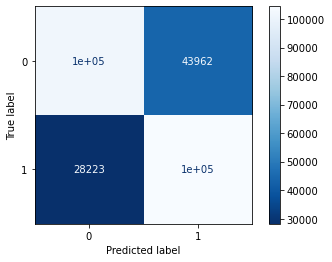

In [93]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [94]:
CLF_cr = classification_report(y_test,y_pred)
print(clf_cr)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74    145918
           1       0.70      0.79      0.74    132639

    accuracy                           0.74    278557
   macro avg       0.74      0.74      0.74    278557
weighted avg       0.75      0.74      0.74    278557



In [89]:
pd.DataFrame({'Value':np.squeeze(CLF_model.coef_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
15,0.000137,BTC_price_60d_rolling_avg
14,0.000081,BTC_price_30d_rolling_avg
72,0.000074,Price_Crypto_collection_cum_median
3,0.000061,BTC_price
63,0.000033,Price_Crypto_max_90d
39,0.000020,Price_USD_max_7d
75,0.000008,pca_1
56,0.000007,Price_Crypto_median_14d
47,0.000005,Price_USD_max_90d
67,0.000005,Price_Crypto_max_365d


In [152]:
def write_model_results(model, model_description):
    model_results_dict[model_description] = {'model_scope': model_scope, 'model_type': model, 'balance_method': balance_method, 
                                                                   'scale_method': scale_method, 'train_acc_score': train_acc_score, 'test_acc_score': test_acc_score, 
                                                                   'balance_acc_score': bal_acc_score, 'f1_score': clf_f1_score, 'precision_score': clf_precision_score, 
                                                                   'recall_score': clf_recall_score, 'roc_auc_score': clf_roc_auc_score, 'confusion_matrix': CLF_cm, 
                                                                   'classification_report': CLF_cr, 'features': X.columns, 'coef_values': np.squeeze(model.coef_), 
                                                                   'date_recorded': datetime.today().strftime('%Y-%m-%d-%H:%M:%S')}

def write_model_results_2(model, model_description):
    model_results_dict[model_description] = {'model_scope': model_scope, 'model_type': model, 'balance_method': balance_method, 
                                                                   'scale_method': scale_method, 'train_acc_score': train_acc_score, 'test_acc_score': test_acc_score, 
                                                                   'balance_acc_score': bal_acc_score, 'f1_score': clf_f1_score, 'precision_score': clf_precision_score, 
                                                                   'recall_score': clf_recall_score, 'roc_auc_score': clf_roc_auc_score, 'confusion_matrix': CLF_cm, 
                                                                   'classification_report': CLF_cr, 'features': X.columns, 'coef_values': np.squeeze(model.feature_importances_), 
                                                                   'date_recorded': datetime.today().strftime('%Y-%m-%d-%H:%M:%S')}

In [101]:
write_model_results(CLF_model, 'secondary-logregr-fill0-nobal-noscale')
model_results_dict

{'secondary-logregr-fill0-nobal-noscale': {'model_scope': 'NFT secondary sales',
  'model_type': LogisticRegression(),
  'balance_method': 'None',
  'scale_method': 'None',
  'train_acc_score': 0.7408124728511579,
  'test_acc_score': 0.7408609368998087,
  'balance_acc_score': 0.7429703224195214,
  'f1_score': 0.743129419216631,
  'precision_score': 0.7037161843399965,
  'recall_score': 0.7872194452611977,
  'roc_auc_score': 0.7429703224195214,
  'confusion_matrix': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7ffac4785450>,
  'classification_report': '              precision    recall  f1-score   support\n\n           0       0.78      0.70      0.74    145918\n           1       0.70      0.79      0.74    132639\n\n    accuracy                           0.74    278557\n   macro avg       0.74      0.74      0.74    278557\nweighted avg       0.75      0.74      0.74    278557\n',
  'features': Index(['nft_sales_count', 'First_item_Unique_id_collection', 'Google

#### Logistic Regression - FillNA=Custom, Unbalanced, Unscaled

In [102]:
# model characteristics to record with results
model_scope = 'NFT secondary sales'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with custom method'
balance_method = 'None'
scale_method = 'None'

In [103]:
X, y, indices = get_x_and_y(df_collection_nft_second, 1)
print(len(X), len(y), len(indices))

1389242 1389242 1389242


In [104]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1111393 277849 1111393 277849 1111393 277849


In [105]:
%%time

# fit the model
CLF_model = LogisticRegression()
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 2min 21s, sys: 1min 5s, total: 3min 27s
Wall time: 28.7 s


In [106]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.7408378494375977
test_acc_score:  0.7402114097945287
balanced_acc_score:  0.742013992657425
f1_score:  0.7415591948384879
precision_score:  0.7056763202725724
recall_score:  0.7812867791290702
roc_auc_score:  0.7420139926574251


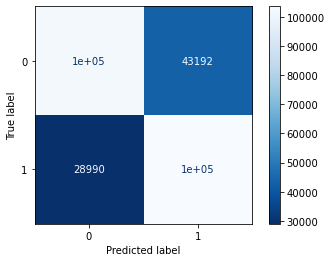

In [107]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [108]:
CLF_cr = classification_report(y_test,y_pred)
print(clf_cr)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74    145918
           1       0.70      0.79      0.74    132639

    accuracy                           0.74    278557
   macro avg       0.74      0.74      0.74    278557
weighted avg       0.75      0.74      0.74    278557



In [109]:
pd.DataFrame({'Value':np.squeeze(CLF_model.coef_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
15,0.000103,BTC_price_60d_rolling_avg
14,0.000068,BTC_price_30d_rolling_avg
72,0.000061,Price_Crypto_collection_cum_median
3,0.000060,BTC_price
63,0.000024,Price_Crypto_max_90d
39,0.000020,Price_USD_max_7d
75,0.000012,pca_1
49,0.000012,Price_USD_max_180d
59,0.000008,Price_Crypto_max_30d
67,0.000008,Price_Crypto_max_365d


In [111]:
write_model_results(CLF_model, 'secondary-logregr-fillcustom-nobal-noscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale'])

#### Logistic Regression - FillNA=0, Unbalanced, Scaled

In [118]:
# model characteristics to record with results
model_scope = 'NFT secondary sales'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with zeroes'
balance_method = 'None'
scale_method = 'MinMaxScaler'

In [119]:
X, y, indices = get_x_and_y(df_collection_nft_second, 0)
print(len(X), len(y), len(indices))

1392785 1392785 1392785


In [122]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_scaled_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1114228 278557 1114228 278557 1114228 278557


In [123]:
%%time

# fit the model
CLF_model = LogisticRegression()
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 2min 18s, sys: 1min 1s, total: 3min 19s
Wall time: 27.2 s


In [124]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.7625503936357729
test_acc_score:  0.7634380037119871
balanced_acc_score:  0.7656013851829258
f1_score:  0.7655213641151185
precision_score:  0.7248859447548065
recall_score:  0.8109831949878995
roc_auc_score:  0.7656013851829256


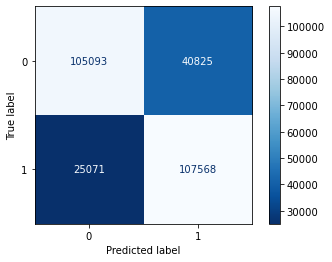

In [125]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [126]:
CLF_cr = classification_report(y_test,y_pred)
print(clf_cr)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74    145918
           1       0.70      0.79      0.74    132639

    accuracy                           0.74    278557
   macro avg       0.74      0.74      0.74    278557
weighted avg       0.75      0.74      0.74    278557



In [127]:
pd.DataFrame({'Value':np.squeeze(CLF_model.coef_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
82,16.315134,pgrank_seller
3,2.900285,BTC_price
9,2.871355,GoogleTrends_30d_rolling_avg
8,2.793519,GoogleTrends_14d_rolling_avg
85,2.193897,pgrank_buyer
25,1.957895,MANA_price_60d_rolling_avg
39,1.801663,Price_USD_max_7d
53,1.600184,Price_USD_max_730d
24,1.485073,MANA_price_30d_rolling_avg
4,1.423812,ETH_price


In [128]:
write_model_results(CLF_model, 'secondary-logregr-fill0-nobal-minmaxscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale'])

#### Logistic Regression - FillNA=Custom, Unbalanced, Scaled

In [129]:
# model characteristics to record with results
model_scope = 'NFT secondary sales'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with custom method'
balance_method = 'None'
scale_method = 'MinMaxScaler'

In [130]:
X, y, indices = get_x_and_y(df_collection_nft_second, 1)
print(len(X), len(y), len(indices))

1389242 1389242 1389242


In [131]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_scaled_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1111393 277849 1111393 277849 1111393 277849


In [132]:
%%time

# fit the model
CLF_model = LogisticRegression()
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 2min 23s, sys: 1min 4s, total: 3min 27s
Wall time: 28.3 s


In [133]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.7631458898877355
test_acc_score:  0.7636665958848151
balanced_acc_score:  0.7658979554108007
f1_score:  0.7668055215225027
precision_score:  0.7243778557578117
recall_score:  0.8145124784983553
roc_auc_score:  0.7658979554108007


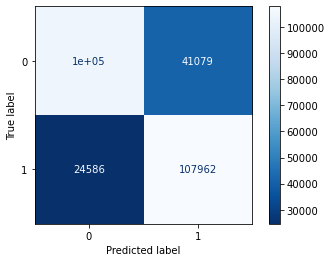

In [134]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [135]:
CLF_cr = classification_report(y_test,y_pred)
print(clf_cr)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74    145918
           1       0.70      0.79      0.74    132639

    accuracy                           0.74    278557
   macro avg       0.74      0.74      0.74    278557
weighted avg       0.75      0.74      0.74    278557



In [136]:
pd.DataFrame({'Value':np.squeeze(CLF_model.coef_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
82,13.868902,pgrank_seller
75,3.193416,pca_1
6,2.581584,WAX_price
16,2.302517,BTC_price_90d_rolling_avg
3,2.131080,BTC_price
85,1.989290,pgrank_buyer
14,1.810630,BTC_price_30d_rolling_avg
15,1.607968,BTC_price_60d_rolling_avg
8,1.500793,GoogleTrends_14d_rolling_avg
9,1.374793,GoogleTrends_30d_rolling_avg


In [137]:
write_model_results(CLF_model, 'secondary-logregr-fillcustom-nobal-minmaxscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale'])

#### LightGBM - FillNA=0, Unbalanced, Unscaled

In [139]:
# model characteristics to record with results
model_scope = 'NFT secondary sales'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with zeroes'
balance_method = 'None'
scale_method = 'None'

In [140]:
X, y, indices = get_x_and_y(df_collection_nft_second, 0)
print(len(X), len(y), len(indices))

1392785 1392785 1392785


In [141]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1114228 278557 1114228 278557 1114228 278557


In [142]:
%%time

# fit the model
# CLF_LGBM = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
# CLF_LGBM.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
#           verbose=20,eval_metric='logloss')
CLF_model = lgb.LGBMClassifier()
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 1min 56s, sys: 713 ms, total: 1min 56s
Wall time: 16.4 s


In [143]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8141942223674149
test_acc_score:  0.8135605998054258
balanced_acc_score:  0.8144460539784524
f1_score:  0.8097070160782073
precision_score:  0.7876629811016774
recall_score:  0.8330204540142794
roc_auc_score:  0.8144460539784524


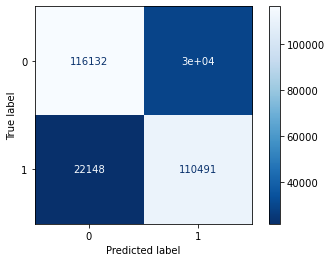

In [144]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [151]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82    145918
           1       0.79      0.83      0.81    132639

    accuracy                           0.81    278557
   macro avg       0.81      0.81      0.81    278557
weighted avg       0.81      0.81      0.81    278557



In [153]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
81,280,deg_centrality_seller
82,266,pgrank_seller
0,190,nft_sales_count
74,188,p_resale
80,170,trans_count_seller
70,135,Price_USD_collection_cum_median
72,113,Price_Crypto_collection_cum_median
84,94,deg_centrality_buyer
85,89,pgrank_buyer
75,84,pca_1


In [154]:
write_model_results_2(CLF_model, 'secondary-lightgbm-fill0-nobal-noscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale'])

#### LightGBM - FillNA=0, Unbalanced, Scaled

In [184]:
# model characteristics to record with results
model_scope = 'NFT secondary sales'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with zeroes'
balance_method = 'None'
scale_method = 'MinMaxScaler'

In [185]:
X, y, indices = get_x_and_y(df_collection_nft_second, 0)
print(len(X), len(y), len(indices))

1392785 1392785 1392785


In [186]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_scaled_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1114228 278557 1114228 278557 1114228 278557


In [187]:
%%time

# fit the model
# CLF_LGBM = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
# CLF_LGBM.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
#           verbose=20,eval_metric='logloss')
CLF_model = lgb.LGBMClassifier()
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 2min, sys: 255 ms, total: 2min
Wall time: 16.1 s


In [188]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8139994686904296
test_acc_score:  0.810656346815912
balanced_acc_score:  0.812134662960653
f1_score:  0.8091863203707522
precision_score:  0.7778566062932977
recall_score:  0.8431456811345079
roc_auc_score:  0.812134662960653


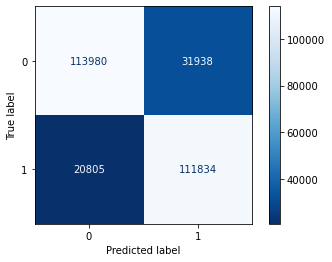

In [189]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [190]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81    145918
           1       0.78      0.84      0.81    132639

    accuracy                           0.81    278557
   macro avg       0.81      0.81      0.81    278557
weighted avg       0.81      0.81      0.81    278557



In [191]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
81,248,deg_centrality_seller
82,242,pgrank_seller
74,199,p_resale
0,173,nft_sales_count
80,167,trans_count_seller
70,137,Price_USD_collection_cum_median
72,121,Price_Crypto_collection_cum_median
85,88,pgrank_buyer
75,81,pca_1
84,80,deg_centrality_buyer


In [192]:
write_model_results_2(CLF_model, 'secondary-lightgbm-fill0-nobal-minmaxscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale'])

#### LightGBM - FillNA=Custom, Unbalanced, Unscaled

In [164]:
# model characteristics to record with results
model_scope = 'NFT secondary sales'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with custom method'
balance_method = 'None'
scale_method = 'None'

In [165]:
X, y, indices = get_x_and_y(df_collection_nft_second, 1)
print(len(X), len(y), len(indices))

1389242 1389242 1389242


In [166]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1111393 277849 1111393 277849 1111393 277849


In [167]:
%%time

# fit the model
# CLF_LGBM = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
# CLF_LGBM.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
#           verbose=20,eval_metric='logloss')
CLF_model = lgb.LGBMClassifier()
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 1min 54s, sys: 684 ms, total: 1min 54s
Wall time: 16 s


In [168]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.814179142751484
test_acc_score:  0.8134562298226735
balanced_acc_score:  0.8142902362131349
f1_score:  0.8098035690040476
precision_score:  0.788347086771693
recall_score:  0.8324606934846245
roc_auc_score:  0.8142902362131349


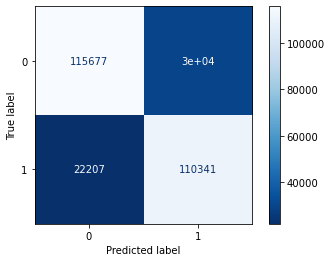

In [169]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [170]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82    145301
           1       0.79      0.83      0.81    132548

    accuracy                           0.81    277849
   macro avg       0.81      0.81      0.81    277849
weighted avg       0.81      0.81      0.81    277849



In [171]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
81,305,deg_centrality_seller
82,303,pgrank_seller
74,206,p_resale
80,158,trans_count_seller
0,147,nft_sales_count
70,137,Price_USD_collection_cum_median
72,110,Price_Crypto_collection_cum_median
84,88,deg_centrality_buyer
85,84,pgrank_buyer
73,68,Price_Crypto_collection_cum_max


In [172]:
write_model_results_2(CLF_model, 'secondary-lightgbm-fillcustom-nobal-noscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale'])

#### LightGBM - FillNA=Custom, Unbalanced, Scaled

In [173]:
# model characteristics to record with results
model_scope = 'NFT secondary sales'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with custom method'
balance_method = 'None'
scale_method = 'MinMaxScaler'

In [175]:
X, y, indices = get_x_and_y(df_collection_nft_second, 1)
print(len(X), len(y), len(indices))

1389242 1389242 1389242


In [176]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_scaled_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1111393 277849 1111393 277849 1111393 277849


In [177]:
%%time

# fit the model
# CLF_LGBM = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
# CLF_LGBM.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
#           verbose=20,eval_metric='logloss')
CLF_model = lgb.LGBMClassifier()
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 1min 57s, sys: 245 ms, total: 1min 57s
Wall time: 15.7 s


In [178]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8147181060165036
test_acc_score:  0.8099255350928022
balanced_acc_score:  0.8116912125211627
f1_score:  0.810155795043604
precision_score:  0.7737472362982188
recall_score:  0.8501599420587259
roc_auc_score:  0.8116912125211627


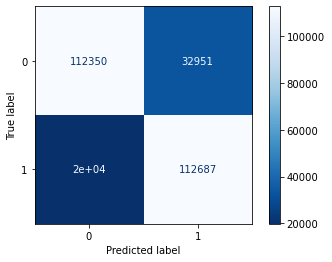

In [179]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [180]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.85      0.77      0.81    145301
           1       0.77      0.85      0.81    132548

    accuracy                           0.81    277849
   macro avg       0.81      0.81      0.81    277849
weighted avg       0.81      0.81      0.81    277849



In [181]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
81,293,deg_centrality_seller
82,270,pgrank_seller
74,207,p_resale
80,160,trans_count_seller
0,158,nft_sales_count
70,137,Price_USD_collection_cum_median
72,123,Price_Crypto_collection_cum_median
84,99,deg_centrality_buyer
85,86,pgrank_buyer
77,66,pca_3


In [183]:
write_model_results_2(CLF_model, 'secondary-lightgbm-fillcustom-nobal-minmaxscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale'])

#### XGBoost - FillNA=0, Unbalanced, Unscaled

In [193]:
# model characteristics to record with results
model_scope = 'NFT secondary sales'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with zeroes'
balance_method = 'None'
scale_method = 'None'

In [194]:
X, y, indices = get_x_and_y(df_collection_nft_second, 0)
print(len(X), len(y), len(indices))

1392785 1392785 1392785


In [195]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1114228 278557 1114228 278557 1114228 278557


In [197]:
%%time

# fit the model
# CLF_XGB = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
CLF_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 22min 21s, sys: 614 ms, total: 22min 22s
Wall time: 2min 51s


In [198]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8287702337403117
test_acc_score:  0.8238242083307905
balanced_acc_score:  0.8244330438726885
f1_score:  0.819022963708711
precision_score:  0.8016141141141141
recall_score:  0.8372047437028325
roc_auc_score:  0.8244330438726885


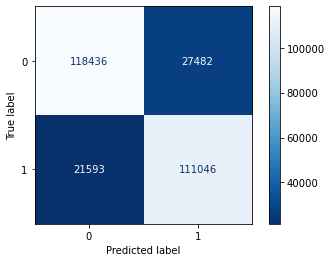

In [199]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [200]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83    145918
           1       0.80      0.84      0.82    132639

    accuracy                           0.82    278557
   macro avg       0.82      0.82      0.82    278557
weighted avg       0.82      0.82      0.82    278557



In [201]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
70,0.246073,Price_USD_collection_cum_median
68,0.105127,Price_Crypto_median_730d
64,0.052606,Price_Crypto_median_180d
0,0.041183,nft_sales_count
66,0.040967,Price_Crypto_median_365d
10,0.029910,GoogleTrends_60d_rolling_avg
74,0.029517,p_resale
71,0.025677,Price_USD_collection_cum_max
42,0.022628,Price_USD_median_30d
4,0.014628,ETH_price


In [202]:
write_model_results_2(CLF_model, 'secondary-xgboost-fill0-nobal-noscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale'])

#### XGBoost - FillNA=0, Unbalanced, Scaled

In [203]:
# model characteristics to record with results
model_scope = 'NFT secondary sales'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with zeroes'
balance_method = 'None'
scale_method = 'MinMaxScaler'

In [204]:
X, y, indices = get_x_and_y(df_collection_nft_second, 0)
print(len(X), len(y), len(indices))

1392785 1392785 1392785


In [205]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_scaled_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1114228 278557 1114228 278557 1114228 278557


In [206]:
%%time

# fit the model
# CLF_XGB = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
CLF_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 26min 35s, sys: 465 ms, total: 26min 35s
Wall time: 3min 21s


In [207]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8284579098712292
test_acc_score:  0.8195880914857642
balanced_acc_score:  0.8208637697968382
f1_score:  0.8173282784039896
precision_score:  0.7891234768937054
recall_score:  0.8476240019903648
roc_auc_score:  0.8208637697968381


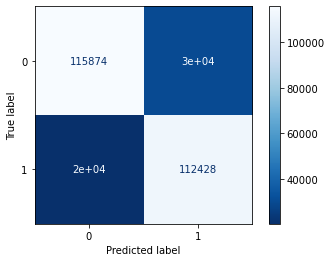

In [208]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [209]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82    145918
           1       0.79      0.85      0.82    132639

    accuracy                           0.82    278557
   macro avg       0.82      0.82      0.82    278557
weighted avg       0.82      0.82      0.82    278557



In [210]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
70,0.233786,Price_USD_collection_cum_median
68,0.113011,Price_Crypto_median_730d
64,0.050055,Price_Crypto_median_180d
66,0.044472,Price_Crypto_median_365d
0,0.041371,nft_sales_count
10,0.039989,GoogleTrends_60d_rolling_avg
74,0.027084,p_resale
71,0.023092,Price_USD_collection_cum_max
42,0.018191,Price_USD_median_30d
4,0.015295,ETH_price


In [211]:
write_model_results_2(CLF_model, 'secondary-xgboost-fill0-nobal-minmaxscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale'])

#### XGBoost - FillNA=Custom, Unbalanced, Unscaled

In [212]:
# model characteristics to record with results
model_scope = 'NFT secondary sales'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with custom method'
balance_method = 'None'
scale_method = 'None'

In [213]:
X, y, indices = get_x_and_y(df_collection_nft_second, 1)
print(len(X), len(y), len(indices))

1389242 1389242 1389242


In [214]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1111393 277849 1111393 277849 1111393 277849


In [215]:
%%time

# fit the model
# CLF_XGB = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
CLF_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 28min 17s, sys: 685 ms, total: 28min 17s
Wall time: 3min 35s


In [216]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8289659913280001
test_acc_score:  0.8244118208091445
balanced_acc_score:  0.8250213041069392
f1_score:  0.81998546216658
precision_score:  0.8024539788689166
recall_score:  0.8383000875154661
roc_auc_score:  0.8250213041069392


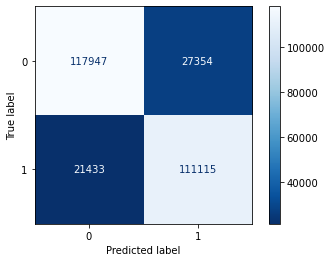

In [217]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [218]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83    145301
           1       0.80      0.84      0.82    132548

    accuracy                           0.82    277849
   macro avg       0.82      0.83      0.82    277849
weighted avg       0.83      0.82      0.82    277849



In [219]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
70,0.248269,Price_USD_collection_cum_median
68,0.127299,Price_Crypto_median_730d
0,0.047111,nft_sales_count
75,0.044199,pca_1
64,0.038915,Price_Crypto_median_180d
74,0.022036,p_resale
42,0.021484,Price_USD_median_30d
71,0.020810,Price_USD_collection_cum_max
13,0.017087,BTC_price_14d_rolling_avg
16,0.015730,BTC_price_90d_rolling_avg


In [220]:
write_model_results_2(CLF_model, 'secondary-xgboost-fillcustom-nobal-noscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale'])

#### XGBoost - FillNA=Custom, Unbalanced, Scaled

In [221]:
# model characteristics to record with results
model_scope = 'NFT secondary sales'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with custom method'
balance_method = 'None'
scale_method = 'MinMaxScaler'

In [222]:
X, y, indices = get_x_and_y(df_collection_nft_second, 1)
print(len(X), len(y), len(indices))

1389242 1389242 1389242


In [223]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_scaled_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1111393 277849 1111393 277849 1111393 277849


In [224]:
%%time

# fit the model
# CLF_XGB = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
CLF_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 22min 45s, sys: 489 ms, total: 22min 46s
Wall time: 2min 53s


In [225]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8285278024965066
test_acc_score:  0.8142408286515338
balanced_acc_score:  0.8160972290475251
f1_score:  0.8147940820800993
precision_score:  0.7769261826717123
recall_score:  0.856542535534297
roc_auc_score:  0.8160972290475251


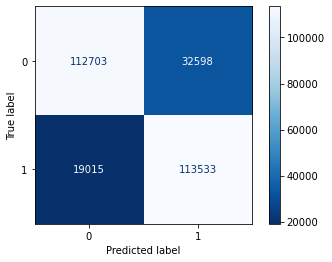

In [226]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [227]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.86      0.78      0.81    145301
           1       0.78      0.86      0.81    132548

    accuracy                           0.81    277849
   macro avg       0.82      0.82      0.81    277849
weighted avg       0.82      0.81      0.81    277849



In [228]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
70,0.240272,Price_USD_collection_cum_median
68,0.116693,Price_Crypto_median_730d
0,0.048401,nft_sales_count
75,0.046397,pca_1
64,0.045646,Price_Crypto_median_180d
74,0.024296,p_resale
42,0.021272,Price_USD_median_30d
71,0.019409,Price_USD_collection_cum_max
13,0.019133,BTC_price_14d_rolling_avg
16,0.015893,BTC_price_90d_rolling_avg


In [229]:
write_model_results_2(CLF_model, 'secondary-xgboost-fillcustom-nobal-minmaxscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale'])

In [231]:
# model_results_dict.items()

#### CatBoost - FillNA=0, Unbalanced, Unscaled

In [404]:
# model characteristics to record with results
model_scope = 'NFT secondary sales'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with zeroes'
balance_method = 'None'
scale_method = 'None'

In [405]:
X, y, indices = get_x_and_y(df_collection_nft_second, 0)
print(len(X), len(y), len(indices))

1392785 1392785 1392785


In [406]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1114228 278557 1114228 278557 1114228 278557


In [417]:
%%time

# fit the model
# Initialize CatBoostClassifier
CLF_model = CatBoostClassifier(iterations=50,
                           learning_rate=0.5,
                           random_seed=42,
                           custom_metric=['Accuracy', 'F1', 'AUC', 'BalancedAccuracy'] #, depth=2
                           )
# Fit model
CLF_model.fit(X_train, y_train)
# Get predicted classes
y_pred = CLF_model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = CLF_model.predict_proba(X_test)
# Get predicted RawFormulaVal
preds_raw = CLF_model.predict(X_test, prediction_type='RawFormulaVal')

0:	learn: 0.5205586	total: 158ms	remaining: 7.72s
1:	learn: 0.4663493	total: 338ms	remaining: 8.11s
2:	learn: 0.4520768	total: 480ms	remaining: 7.52s
3:	learn: 0.4454935	total: 638ms	remaining: 7.33s
4:	learn: 0.4412975	total: 796ms	remaining: 7.16s
5:	learn: 0.4371910	total: 936ms	remaining: 6.87s
6:	learn: 0.4344156	total: 1.07s	remaining: 6.6s
7:	learn: 0.4315332	total: 1.2s	remaining: 6.31s
8:	learn: 0.4265941	total: 1.37s	remaining: 6.24s
9:	learn: 0.4242319	total: 1.51s	remaining: 6.03s
10:	learn: 0.4231183	total: 1.66s	remaining: 5.87s
11:	learn: 0.4221275	total: 1.77s	remaining: 5.62s
12:	learn: 0.4208785	total: 1.91s	remaining: 5.43s
13:	learn: 0.4188889	total: 2.08s	remaining: 5.34s
14:	learn: 0.4177666	total: 2.22s	remaining: 5.18s
15:	learn: 0.4172042	total: 2.35s	remaining: 4.99s
16:	learn: 0.4160952	total: 2.5s	remaining: 4.84s
17:	learn: 0.4151062	total: 2.63s	remaining: 4.67s
18:	learn: 0.4137159	total: 2.77s	remaining: 4.52s
19:	learn: 0.4128675	total: 2.92s	remaining:

In [418]:
print(CLF_model.get_best_score())

{'learn': {'Accuracy': 0.811709991132874, 'F1': 0.806870966851083, 'Logloss': 0.39685109233546506, 'BalancedAccuracy': 0.8124080803624705}}


In [419]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.811709991132874
test_acc_score:  0.8106204475206151
balanced_acc_score:  0.811346376983067
f1_score:  0.8060729712342616
precision_score:  0.7865639303803825
recall_score:  0.8265743861156974
roc_auc_score:  0.811346376983067


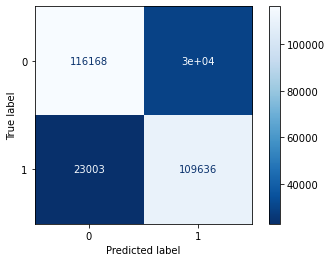

In [414]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [415]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81    145918
           1       0.79      0.83      0.81    132639

    accuracy                           0.81    278557
   macro avg       0.81      0.81      0.81    278557
weighted avg       0.81      0.81      0.81    278557



In [416]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
0,19.172746,nft_sales_count
70,11.567118,Price_USD_collection_cum_median
82,8.407521,pgrank_seller
81,8.184092,deg_centrality_seller
74,5.805758,p_resale
73,4.508097,Price_Crypto_collection_cum_max
72,3.492910,Price_Crypto_collection_cum_median
71,3.102862,Price_USD_collection_cum_max
83,2.743645,trans_count_buyer
64,2.736303,Price_Crypto_median_180d


In [420]:
write_model_results_2(CLF_model, 'secondary-catboost-fill0-nobal-noscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale', 'secondary2-49-lightgbm-fill0-nobal-minmaxscale', 'secondary2-49-lightgbm-fillcustom-nobal-noscale', 'secondary2-49-lightgbm-fillcustom-nobal-minmaxscale', 'secondary2-49-xgboost-fill0-nobal-nosc

#### CatBoost - FillNA=0, Unbalanced, Scaled

In [421]:
# model characteristics to record with results
model_scope = 'NFT secondary sales'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with zeroes'
balance_method = 'None'
scale_method = 'MinMaxScaler'

In [422]:
X, y, indices = get_x_and_y(df_collection_nft_second, 0)
print(len(X), len(y), len(indices))

1392785 1392785 1392785


In [427]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_scaled_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1114228 278557 1114228 278557 1114228 278557


In [428]:
%%time

# fit the model
# Initialize CatBoostClassifier
CLF_model = CatBoostClassifier(iterations=50,
                           learning_rate=0.5,
                           random_seed=42,
                           custom_metric=['Accuracy', 'F1', 'AUC', 'BalancedAccuracy'] #, depth=2
                           )
# Fit model
CLF_model.fit(X_train, y_train)
# Get predicted classes
y_pred = CLF_model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = CLF_model.predict_proba(X_test)
# Get predicted RawFormulaVal
preds_raw = CLF_model.predict(X_test, prediction_type='RawFormulaVal')

0:	learn: 0.5206406	total: 169ms	remaining: 8.26s
1:	learn: 0.4662121	total: 339ms	remaining: 8.13s
2:	learn: 0.4530704	total: 490ms	remaining: 7.68s
3:	learn: 0.4461500	total: 652ms	remaining: 7.5s
4:	learn: 0.4421110	total: 800ms	remaining: 7.2s
5:	learn: 0.4383497	total: 932ms	remaining: 6.84s
6:	learn: 0.4331361	total: 1.08s	remaining: 6.64s
7:	learn: 0.4303149	total: 1.22s	remaining: 6.38s
8:	learn: 0.4277387	total: 1.35s	remaining: 6.17s
9:	learn: 0.4255023	total: 1.5s	remaining: 5.98s
10:	learn: 0.4241959	total: 1.65s	remaining: 5.87s
11:	learn: 0.4215364	total: 1.83s	remaining: 5.8s
12:	learn: 0.4204544	total: 1.97s	remaining: 5.6s
13:	learn: 0.4191953	total: 2.1s	remaining: 5.39s
14:	learn: 0.4181790	total: 2.24s	remaining: 5.22s
15:	learn: 0.4169719	total: 2.37s	remaining: 5.04s
16:	learn: 0.4161876	total: 2.49s	remaining: 4.83s
17:	learn: 0.4147935	total: 2.62s	remaining: 4.65s
18:	learn: 0.4139289	total: 2.78s	remaining: 4.53s
19:	learn: 0.4128072	total: 2.96s	remaining: 4.

In [429]:
print(CLF_model.get_best_score())

{'learn': {'Accuracy': 0.8113779226513783, 'F1': 0.8066798509865244, 'Logloss': 0.39627252585493006, 'BalancedAccuracy': 0.8121119098469797}}


In [430]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8113779226513783
test_acc_score:  0.8082798134672616
balanced_acc_score:  0.809595943583485
f1_score:  0.8061503392051454
precision_score:  0.7773173360959834
recall_score:  0.8372047437028325
roc_auc_score:  0.809595943583485


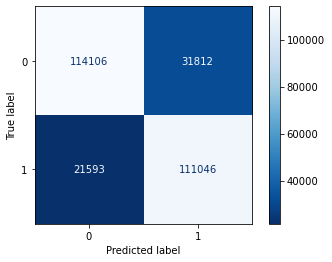

In [431]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [432]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81    145918
           1       0.78      0.84      0.81    132639

    accuracy                           0.81    278557
   macro avg       0.81      0.81      0.81    278557
weighted avg       0.81      0.81      0.81    278557



In [433]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
0,17.773752,nft_sales_count
70,11.855172,Price_USD_collection_cum_median
81,10.504928,deg_centrality_seller
82,8.978105,pgrank_seller
74,4.664400,p_resale
73,3.834547,Price_Crypto_collection_cum_max
83,3.299153,trans_count_buyer
72,2.819248,Price_Crypto_collection_cum_median
71,2.809241,Price_USD_collection_cum_max
68,2.594242,Price_Crypto_median_730d


In [434]:
write_model_results_2(CLF_model, 'secondary-catboost-fill0-nobal-minmaxscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale', 'secondary2-49-lightgbm-fill0-nobal-minmaxscale', 'secondary2-49-lightgbm-fillcustom-nobal-noscale', 'secondary2-49-lightgbm-fillcustom-nobal-minmaxscale', 'secondary2-49-xgboost-fill0-nobal-nosc

#### CatBoost - FillNA=Custom, Unbalanced, Unscaled

In [435]:
# model characteristics to record with results
model_scope = 'NFT secondary sales'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with custom method'
balance_method = 'None'
scale_method = 'None'

In [436]:
X, y, indices = get_x_and_y(df_collection_nft_second, 1)
print(len(X), len(y), len(indices))

1389242 1389242 1389242


In [437]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1111393 277849 1111393 277849 1111393 277849


In [438]:
%%time

# fit the model
# Initialize CatBoostClassifier
CLF_model = CatBoostClassifier(iterations=50,
                           learning_rate=0.5,
                           random_seed=42,
                           custom_metric=['Accuracy', 'F1', 'AUC', 'BalancedAccuracy'] #, depth=2
                           )
# Fit model
CLF_model.fit(X_train, y_train)
# Get predicted classes
y_pred = CLF_model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = CLF_model.predict_proba(X_test)
# Get predicted RawFormulaVal
preds_raw = CLF_model.predict(X_test, prediction_type='RawFormulaVal')

0:	learn: 0.5186724	total: 157ms	remaining: 7.69s
1:	learn: 0.4631257	total: 323ms	remaining: 7.74s
2:	learn: 0.4504151	total: 484ms	remaining: 7.59s
3:	learn: 0.4424883	total: 627ms	remaining: 7.21s
4:	learn: 0.4377189	total: 757ms	remaining: 6.81s
5:	learn: 0.4348837	total: 897ms	remaining: 6.58s
6:	learn: 0.4305278	total: 1.04s	remaining: 6.42s
7:	learn: 0.4274354	total: 1.17s	remaining: 6.15s
8:	learn: 0.4256021	total: 1.31s	remaining: 5.96s
9:	learn: 0.4238954	total: 1.46s	remaining: 5.83s
10:	learn: 0.4217903	total: 1.6s	remaining: 5.69s
11:	learn: 0.4202747	total: 1.72s	remaining: 5.45s
12:	learn: 0.4184161	total: 1.89s	remaining: 5.38s
13:	learn: 0.4176346	total: 2.01s	remaining: 5.16s
14:	learn: 0.4161827	total: 2.16s	remaining: 5.05s
15:	learn: 0.4152452	total: 2.29s	remaining: 4.87s
16:	learn: 0.4139720	total: 2.43s	remaining: 4.72s
17:	learn: 0.4131416	total: 2.57s	remaining: 4.57s
18:	learn: 0.4119554	total: 2.73s	remaining: 4.45s
19:	learn: 0.4113992	total: 2.84s	remainin

In [439]:
print(CLF_model.get_best_score())

{'learn': {'Accuracy': 0.8130283347114837, 'F1': 0.8089975632825002, 'Logloss': 0.3947123227154494, 'BalancedAccuracy': 0.8137769716418184}}


In [440]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8130283347114837
test_acc_score:  0.8115739124488481
balanced_acc_score:  0.8122948521718214
f1_score:  0.8074186879722204
precision_score:  0.7878339770002728
recall_score:  0.8280019313758035
roc_auc_score:  0.8122948521718214


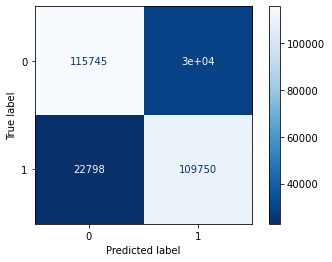

In [441]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [442]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82    145301
           1       0.79      0.83      0.81    132548

    accuracy                           0.81    277849
   macro avg       0.81      0.81      0.81    277849
weighted avg       0.81      0.81      0.81    277849



In [443]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
0,17.879521,nft_sales_count
70,16.152016,Price_USD_collection_cum_median
81,10.853489,deg_centrality_seller
74,8.318938,p_resale
75,6.875388,pca_1
82,6.078175,pgrank_seller
71,3.134096,Price_USD_collection_cum_max
83,2.725329,trans_count_buyer
68,2.626235,Price_Crypto_median_730d
72,2.166250,Price_Crypto_collection_cum_median


In [444]:
write_model_results_2(CLF_model, 'secondary-catboost-fillcustom-nobal-noscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale', 'secondary2-49-lightgbm-fill0-nobal-minmaxscale', 'secondary2-49-lightgbm-fillcustom-nobal-noscale', 'secondary2-49-lightgbm-fillcustom-nobal-minmaxscale', 'secondary2-49-xgboost-fill0-nobal-nosc

#### CatBoost - FillNA=Custom, Unbalanced, Scaled

In [445]:
# model characteristics to record with results
model_scope = 'NFT secondary sales'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with custom method'
balance_method = 'None'
scale_method = 'MinMaxScaler'

In [446]:
X, y, indices = get_x_and_y(df_collection_nft_second, 1)
print(len(X), len(y), len(indices))

1389242 1389242 1389242


In [447]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_scaled_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1111393 277849 1111393 277849 1111393 277849


In [448]:
%%time

# fit the model
# Initialize CatBoostClassifier
CLF_model = CatBoostClassifier(iterations=50,
                           learning_rate=0.5,
                           random_seed=42,
                           custom_metric=['Accuracy', 'F1', 'AUC', 'BalancedAccuracy'] #, depth=2
                           )
# Fit model
CLF_model.fit(X_train, y_train)
# Get predicted classes
y_pred = CLF_model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = CLF_model.predict_proba(X_test)
# Get predicted RawFormulaVal
preds_raw = CLF_model.predict(X_test, prediction_type='RawFormulaVal')

0:	learn: 0.5186724	total: 161ms	remaining: 7.9s
1:	learn: 0.4631257	total: 328ms	remaining: 7.86s
2:	learn: 0.4504151	total: 492ms	remaining: 7.71s
3:	learn: 0.4424883	total: 637ms	remaining: 7.32s
4:	learn: 0.4377189	total: 768ms	remaining: 6.91s
5:	learn: 0.4348837	total: 910ms	remaining: 6.67s
6:	learn: 0.4303749	total: 1.06s	remaining: 6.52s
7:	learn: 0.4272792	total: 1.19s	remaining: 6.23s
8:	learn: 0.4254444	total: 1.33s	remaining: 6.04s
9:	learn: 0.4234151	total: 1.48s	remaining: 5.93s
10:	learn: 0.4220623	total: 1.62s	remaining: 5.75s
11:	learn: 0.4204156	total: 1.74s	remaining: 5.52s
12:	learn: 0.4190515	total: 1.89s	remaining: 5.38s
13:	learn: 0.4162331	total: 2.05s	remaining: 5.26s
14:	learn: 0.4147237	total: 2.2s	remaining: 5.13s
15:	learn: 0.4140077	total: 2.34s	remaining: 4.97s
16:	learn: 0.4134255	total: 2.48s	remaining: 4.81s
17:	learn: 0.4127546	total: 2.6s	remaining: 4.63s
18:	learn: 0.4119429	total: 2.76s	remaining: 4.51s
19:	learn: 0.4111417	total: 2.9s	remaining: 

In [449]:
print(CLF_model.get_best_score())

{'learn': {'Accuracy': 0.8126351344663859, 'F1': 0.8085263676688024, 'Logloss': 0.39508682196700584, 'BalancedAccuracy': 0.8133665729166653}}


In [450]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8126351344663859
test_acc_score:  0.8047572602384748
balanced_acc_score:  0.8070867915511672
f1_score:  0.8073976240689063
precision_score:  0.7625578432030045
recall_score:  0.8578401786522618
roc_auc_score:  0.8070867915511671


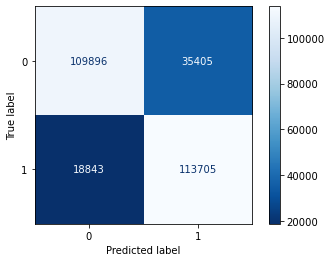

In [451]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [452]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.85      0.76      0.80    145301
           1       0.76      0.86      0.81    132548

    accuracy                           0.80    277849
   macro avg       0.81      0.81      0.80    277849
weighted avg       0.81      0.80      0.80    277849



In [453]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
0,18.050040,nft_sales_count
70,17.221460,Price_USD_collection_cum_median
81,9.095001,deg_centrality_seller
74,8.737819,p_resale
82,6.716178,pgrank_seller
75,6.518225,pca_1
83,2.835222,trans_count_buyer
68,2.807452,Price_Crypto_median_730d
71,2.665869,Price_USD_collection_cum_max
80,1.419171,trans_count_seller


In [454]:
write_model_results_2(CLF_model, 'secondary-catboost-fillcustom-nobal-minmaxscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale', 'secondary2-49-lightgbm-fill0-nobal-minmaxscale', 'secondary2-49-lightgbm-fillcustom-nobal-noscale', 'secondary2-49-lightgbm-fillcustom-nobal-minmaxscale', 'secondary2-49-xgboost-fill0-nobal-nosc

### Predict whether sales of NFTs that were sold between 2-49 times would increase or decrease

In [237]:
df_collection_nft_second_2_50 = df_all_values[(df_all_values['nft_sales_count'] > 1) & (df_all_values['nft_sales_count'] < 50)]
print(len(df_collection_nft_second_2_50))
df_collection_nft_second_2_50.head()

2293360


,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,pca_2,pca_3,pca_4,pca_5,trans_count_seller,deg_centrality_seller,pgrank_seller,trans_count_buyer,deg_centrality_buyer,pgrank_buyer
6,0x8ae8d2ae74a96595bcdab803b563f594009e3db2,18,0xc9cbdfeaae0b56646844eba98d2d83da098707b82a19...,0xd5f4bbd4d1f9ecf3bccb12ac8a2c8bdc5b45b482,Crypto_Wizard_89,0x61592a6f682bbabfd743aa7596ee269e7448212c,AceKennedy,https://lh3.googleusercontent.com/sqP3FLVmlLr6...,http://www.aicryptoart.org/artpieces/18_Specia...,https://lh3.googleusercontent.com/sqP3FLVmlLr6...,...,2.565265,25.302385,-15.823856,-1.457436,1,0.000021,0.000001,1,0.002481,2.263459e-04
26,0x5f4becdcfcbeaf8274b6905b101aaf44ac10012c,23,0xa52e91d4f8f6c395c6e701f657a0e50b2bd5245f3c5c...,0xdc546f477f273bcf327297bf4adcb671b5f20be1,BlackBoxDotArt,0x425a2ca37c24b96a3935e78f54c31d8aac78208f,jfcBishop,https://lh3.googleusercontent.com/NW1g3yh7wWAj...,https://ipfs.io/ipfs/QmVGvA4ekoduGrfeJGj6X3nhn...,https://lh3.googleusercontent.com/NW1g3yh7wWAj...,...,NaN,NaN,NaN,NaN,1,0.000430,0.000020,1,0.000435,4.930488e-05
27,0x5f4becdcfcbeaf8274b6905b101aaf44ac10012c,23,0x3f5fb3c302839bff08c5b9efac7011d92c2a26a7338a...,0x425a2ca37c24b96a3935e78f54c31d8aac78208f,jfcBishop,0x2b706e5955ade3033613b33a207f0a4ecf182f1d,lokh,https://lh3.googleusercontent.com/NW1g3yh7wWAj...,https://ipfs.io/ipfs/QmVGvA4ekoduGrfeJGj6X3nhn...,https://lh3.googleusercontent.com/NW1g3yh7wWAj...,...,NaN,NaN,NaN,NaN,1,0.000435,0.000016,1,0.000030,9.367911e-07
52,0xef547d017f64863a1a741864d900956081744238,67,0x6266ab37c74a31d75a9506c9fb927e2fb0dba1ffcc4b...,0x73b4437a4b3e43de673836107437e4f092a363e0,Bitcoin,0xb88555545e36ad0eee39e401e5f47cfa7d580df1,cmodgli,https://lh3.googleusercontent.com/AHu4hho7-a6H...,NaN,https://lh3.googleusercontent.com/AHu4hho7-a6H...,...,3.365610,14.981804,-14.954402,0.377541,2,0.000295,0.000007,2,0.000032,1.760260e-06
136,0x495f947276749ce646f68ac8c248420045cb7b5e,8608896838368138576952528182966876787734253624...,0xecb2520b6d9a2562ca839d94f83ad0fff376513e6f1f...,0xbe54a11e59d1ee3c04ca5f6c7773ebc759cd1afd,squidGAN,0x12c39a34c51302072ae7f08efc3b8276f1b67a06,UltraPotato2,https://lh3.googleusercontent.com/GTdqVu8wAEr4...,NaN,https://lh3.googleusercontent.com/GTdqVu8wAEr4...,...,-2.301886,22.523252,-14.456810,5.132076,1,0.000021,0.000001,1,0.000004,7.899614e-07


#### Logistic Regression - FillNA=0, Unbalanced, Unscaled

In [238]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with zeroes'
balance_method = 'None'
scale_method = 'None'

In [239]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 0)
print(len(X), len(y), len(indices))

2293360 2293360 2293360


In [240]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1834688 458672 1834688 458672 1834688 458672


In [241]:
%%time

# fit the model
CLF_model = LogisticRegression()
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 3min 31s, sys: 1min 12s, total: 4min 44s
Wall time: 43.8 s


In [242]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.7061963669027105
test_acc_score:  0.706703265078313
balanced_acc_score:  0.5317204154996382
f1_score:  0.2015490993263495
precision_score:  0.4305456942894817
recall_score:  0.13157017876930469
roc_auc_score:  0.5317204154996382


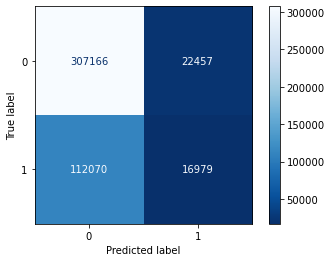

In [243]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [244]:
CLF_cr = classification_report(y_test,y_pred)
print(clf_cr)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74    145918
           1       0.70      0.79      0.74    132639

    accuracy                           0.74    278557
   macro avg       0.74      0.74      0.74    278557
weighted avg       0.75      0.74      0.74    278557



In [245]:
pd.DataFrame({'Value':np.squeeze(CLF_model.coef_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
14,0.000116,BTC_price_30d_rolling_avg
15,0.000088,BTC_price_60d_rolling_avg
13,0.000068,BTC_price_14d_rolling_avg
72,0.000029,Price_Crypto_collection_cum_median
63,0.000023,Price_Crypto_max_90d
39,0.000011,Price_USD_max_7d
70,0.000007,Price_USD_collection_cum_median
41,0.000006,Price_USD_max_14d
61,0.000006,Price_Crypto_max_60d
67,0.000006,Price_Crypto_max_365d


In [246]:
write_model_results(CLF_model, 'secondary2-49-logregr-fill0-nobal-noscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale'])

#### Logistic Regression - FillNA=0, Unbalanced, Scaled

In [247]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with zeroes'
balance_method = 'None'
scale_method = 'MinMaxScaler'

In [248]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 0)
print(len(X), len(y), len(indices))

2293360 2293360 2293360


In [249]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_scaled_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1834688 458672 1834688 458672 1834688 458672


In [250]:
%%time

# fit the model
CLF_model = LogisticRegression()
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 3min 15s, sys: 1min 8s, total: 4min 24s
Wall time: 40.2 s


In [251]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.865775543307636
test_acc_score:  0.8656839746049465
balanced_acc_score:  0.852574111827433
f1_score:  0.7750888042728271
precision_score:  0.7327705221304912
recall_score:  0.8225945183612426
roc_auc_score:  0.8525741118274329


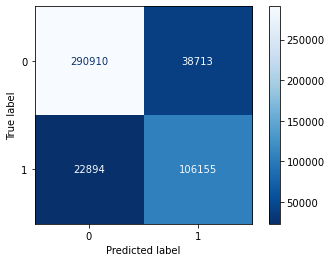

In [252]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [253]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90    329623
           1       0.73      0.82      0.78    129049

    accuracy                           0.87    458672
   macro avg       0.83      0.85      0.84    458672
weighted avg       0.87      0.87      0.87    458672



In [254]:
pd.DataFrame({'Value':np.squeeze(CLF_model.coef_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
82,17.232112,pgrank_seller
3,3.277559,BTC_price
9,3.052977,GoogleTrends_30d_rolling_avg
8,2.561987,GoogleTrends_14d_rolling_avg
85,2.456787,pgrank_buyer
39,1.798236,Price_USD_max_7d
25,1.750105,MANA_price_60d_rolling_avg
53,1.561377,Price_USD_max_730d
24,1.528796,MANA_price_30d_rolling_avg
4,1.447345,ETH_price


In [255]:
write_model_results(CLF_model, 'secondary2-49-logregr-fill0-nobal-minmaxscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale'])

#### Logistic Regression - FillNA=Custom, Unbalanced, Unscaled

In [256]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with custom method'
balance_method = 'None'
scale_method = 'None'

In [257]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 1) #0 to fillnas with 0s; 1 to custom fill
print(len(X), len(y), len(indices))

2289248 2289248 2289248


In [258]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1831398 457850 1831398 457850 1831398 457850


In [259]:
%%time

# fit the model
CLF_model = LogisticRegression()
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 3min 32s, sys: 1min 11s, total: 4min 44s
Wall time: 43.7 s


In [260]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.7051263570234324
test_acc_score:  0.7057748170798296
balanced_acc_score:  0.5378638098354895
f1_score:  0.22721562193449937
precision_score:  0.43577951369787654
recall_score:  0.1536694756118379
roc_auc_score:  0.5378638098354895


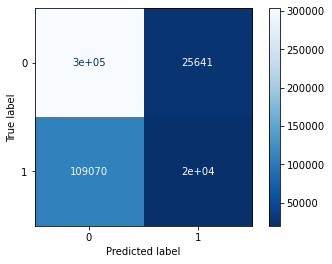

In [261]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [262]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.74      0.92      0.82    328976
           1       0.44      0.15      0.23    128874

    accuracy                           0.71    457850
   macro avg       0.59      0.54      0.52    457850
weighted avg       0.65      0.71      0.65    457850



In [263]:
pd.DataFrame({'Value':np.squeeze(CLF_model.coef_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
14,0.000131,BTC_price_30d_rolling_avg
15,0.000093,BTC_price_60d_rolling_avg
13,0.000080,BTC_price_14d_rolling_avg
72,0.000032,Price_Crypto_collection_cum_median
63,0.000028,Price_Crypto_max_90d
39,0.000011,Price_USD_max_7d
61,0.000011,Price_Crypto_max_60d
70,0.000008,Price_USD_collection_cum_median
67,0.000005,Price_Crypto_max_365d
46,0.000005,Price_USD_median_90d


In [264]:
write_model_results(CLF_model, 'secondary2-49-logregr-fillcustom-nobal-noscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale'])

#### Logistic Regression - FillNA=Custom, Unbalanced, Scaled

In [265]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with custom method'
balance_method = 'None'
scale_method = 'MinMaxScaler'

In [266]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 1)
print(len(X), len(y), len(indices))

2289248 2289248 2289248


In [267]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_scaled_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1831398 457850 1831398 457850 1831398 457850


In [268]:
%%time

# fit the model
CLF_model = LogisticRegression()
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 3min 26s, sys: 1min 6s, total: 4min 33s
Wall time: 41.6 s


In [269]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8673494237735325
test_acc_score:  0.8664977612755269
balanced_acc_score:  0.853006188832067
f1_score:  0.7761255255871193
precision_score:  0.7349917449394398
recall_score:  0.8221363502335615
roc_auc_score:  0.853006188832067


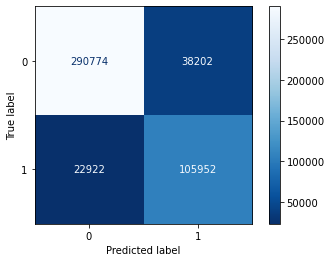

In [270]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [272]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90    328976
           1       0.73      0.82      0.78    128874

    accuracy                           0.87    457850
   macro avg       0.83      0.85      0.84    457850
weighted avg       0.87      0.87      0.87    457850



In [273]:
pd.DataFrame({'Value':np.squeeze(CLF_model.coef_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
82,14.811791,pgrank_seller
75,3.272753,pca_1
85,2.930174,pgrank_buyer
6,2.710522,WAX_price
3,2.452204,BTC_price
14,2.082733,BTC_price_30d_rolling_avg
16,1.833653,BTC_price_90d_rolling_avg
24,1.795530,MANA_price_30d_rolling_avg
8,1.705198,GoogleTrends_14d_rolling_avg
9,1.613948,GoogleTrends_30d_rolling_avg


In [274]:
write_model_results(CLF_model, 'secondary2-49-logregr-fillcustom-nobal-minmaxscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale'])

#### LightGBM - FillNA=0, Unbalanced, Unscaled

In [286]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with zeroes'
balance_method = 'None'
scale_method = 'None'

In [287]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 0)
print(len(X), len(y), len(indices))

2293360 2293360 2293360


In [288]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1834688 458672 1834688 458672 1834688 458672


In [289]:
%%time

# fit the model
# CLF_LGBM = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
# CLF_LGBM.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
#           verbose=20,eval_metric='logloss')
CLF_model = lgb.LGBMClassifier()
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 3min 9s, sys: 980 ms, total: 3min 10s
Wall time: 26.2 s


In [290]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8946431218823037
test_acc_score:  0.8935710049883141
balanced_acc_score:  0.8789551147246215
f1_score:  0.817200032953124
precision_score:  0.7907055950491677
recall_score:  0.8455315422823889
roc_auc_score:  0.8789551147246216


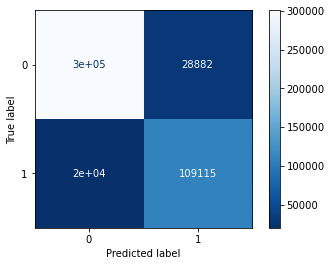

In [291]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [292]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92    329623
           1       0.79      0.85      0.82    129049

    accuracy                           0.89    458672
   macro avg       0.86      0.88      0.87    458672
weighted avg       0.90      0.89      0.89    458672



In [293]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
81,259,deg_centrality_seller
82,239,pgrank_seller
74,208,p_resale
80,150,trans_count_seller
0,145,nft_sales_count
70,119,Price_USD_collection_cum_median
72,103,Price_Crypto_collection_cum_median
1,92,First_item_Unique_id_collection
84,84,deg_centrality_buyer
75,76,pca_1


In [294]:
write_model_results_2(CLF_model, 'secondary2-49-lightgbm-fill0-nobal-noscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale'])

#### LightGBM - FillNA=0, Unbalanced, Scaled

In [295]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with zeroes'
balance_method = 'None'
scale_method = 'MinMaxScaler'

In [296]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 0)
print(len(X), len(y), len(indices))

2293360 2293360 2293360


In [297]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_scaled_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1834688 458672 1834688 458672 1834688 458672


In [298]:
%%time

# fit the model
# CLF_LGBM = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
# CLF_LGBM.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
#           verbose=20,eval_metric='logloss')
CLF_model = lgb.LGBMClassifier()
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 3min 7s, sys: 440 ms, total: 3min 8s
Wall time: 25 s


In [299]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8946981721142777
test_acc_score:  0.8915543133219381
balanced_acc_score:  0.8786647898789877
f1_score:  0.8150307718052172
precision_score:  0.7835142207541504
recall_score:  0.8491890677184635
roc_auc_score:  0.8786647898789878


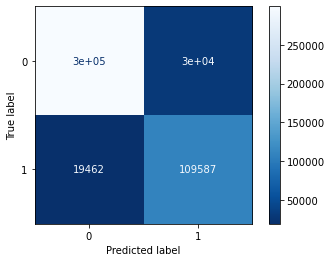

In [300]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [301]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92    329623
           1       0.78      0.85      0.82    129049

    accuracy                           0.89    458672
   macro avg       0.86      0.88      0.87    458672
weighted avg       0.90      0.89      0.89    458672



In [302]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
81,252,deg_centrality_seller
82,243,pgrank_seller
74,206,p_resale
80,163,trans_count_seller
0,148,nft_sales_count
70,140,Price_USD_collection_cum_median
72,110,Price_Crypto_collection_cum_median
1,91,First_item_Unique_id_collection
75,85,pca_1
84,82,deg_centrality_buyer


In [303]:
write_model_results_2(CLF_model, 'secondary2-49-lightgbm-fill0-nobal-minmaxscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale', 'secondary2-49-lightgbm-fill0-nobal-minmaxscale'])

#### LightGBM - FillNA=Custom, Unbalanced, Unscaled

In [304]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with custom method'
balance_method = 'None'
scale_method = 'None'

In [305]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 1)
print(len(X), len(y), len(indices))

2289248 2289248 2289248


In [306]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1831398 457850 1831398 457850 1831398 457850


In [307]:
%%time

# fit the model
# CLF_LGBM = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
# CLF_LGBM.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
#           verbose=20,eval_metric='logloss')
CLF_model = lgb.LGBMClassifier()
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 3min 6s, sys: 1.15 s, total: 3min 8s
Wall time: 25.9 s


In [308]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8945406732998508
test_acc_score:  0.8935131593316589
balanced_acc_score:  0.8798078222931671
f1_score:  0.8176981091156554
precision_score:  0.7890984144854114
recall_score:  0.8484488725421729
roc_auc_score:  0.8798078222931672


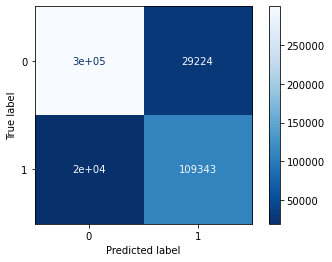

In [309]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [310]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92    328976
           1       0.79      0.85      0.82    128874

    accuracy                           0.89    457850
   macro avg       0.86      0.88      0.87    457850
weighted avg       0.90      0.89      0.89    457850



In [311]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
82,274,pgrank_seller
81,264,deg_centrality_seller
74,210,p_resale
80,168,trans_count_seller
0,136,nft_sales_count
70,132,Price_USD_collection_cum_median
72,112,Price_Crypto_collection_cum_median
84,93,deg_centrality_buyer
1,91,First_item_Unique_id_collection
85,81,pgrank_buyer


In [312]:
write_model_results_2(CLF_model, 'secondary2-49-lightgbm-fillcustom-nobal-noscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale', 'secondary2-49-lightgbm-fill0-nobal-minmaxscale', 'secondary2-49-lightgbm-fillcustom-nobal-noscale'])

#### LightGBM - FillNA=Custom, Unbalanced, Scaled

In [313]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with custom method'
balance_method = 'None'
scale_method = 'MinMaxScaler'

In [314]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 1)
print(len(X), len(y), len(indices))

2289248 2289248 2289248


In [315]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_scaled_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1831398 457850 1831398 457850 1831398 457850


In [316]:
%%time

# fit the model
# CLF_LGBM = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
# CLF_LGBM.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
#           verbose=20,eval_metric='logloss')
CLF_model = lgb.LGBMClassifier()
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 3min 3s, sys: 371 ms, total: 3min 4s
Wall time: 24.4 s


In [317]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8945286606188279
test_acc_score:  0.8925783553565578
balanced_acc_score:  0.878515428611814
f1_score:  0.8160179556719349
precision_score:  0.7877949599497295
recall_score:  0.8463382839052097
roc_auc_score:  0.8785154286118141


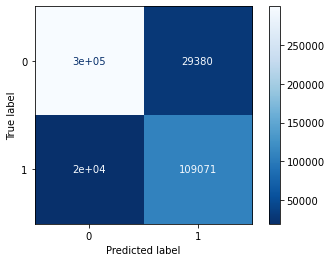

In [318]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [319]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92    328976
           1       0.79      0.85      0.82    128874

    accuracy                           0.89    457850
   macro avg       0.86      0.88      0.87    457850
weighted avg       0.90      0.89      0.89    457850



In [320]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
81,268,deg_centrality_seller
82,255,pgrank_seller
74,192,p_resale
80,150,trans_count_seller
0,138,nft_sales_count
70,125,Price_USD_collection_cum_median
72,110,Price_Crypto_collection_cum_median
1,92,First_item_Unique_id_collection
84,78,deg_centrality_buyer
85,76,pgrank_buyer


In [321]:
write_model_results_2(CLF_model, 'secondary2-49-lightgbm-fillcustom-nobal-minmaxscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale', 'secondary2-49-lightgbm-fill0-nobal-minmaxscale', 'secondary2-49-lightgbm-fillcustom-nobal-noscale', 'secondary2-49-lightgbm-fillcustom-nobal-minmaxscale'])

#### XGBoost - FillNA=0, Unbalanced, Unscaled

In [322]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with zeroes'
balance_method = 'None'
scale_method = 'None'

In [633]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 0)
print(len(X), len(y), len(indices))

2293360 2293360 2293360


In [634]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1834688 458672 1834688 458672 1834688 458672


In [635]:
%%time

# fit the model
# CLF_XGB = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
CLF_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 51min 47s, sys: 4.32 s, total: 51min 51s
Wall time: 6min 39s


In [636]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.9018067377123522
test_acc_score:  0.8989997209334775
balanced_acc_score:  0.8831470968424034
f1_score:  0.8251241940598245
precision_score:  0.8044443135898247
recall_score:  0.8468953653263489
roc_auc_score:  0.8831470968424034


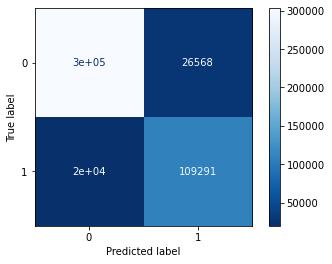

In [637]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

<AxesSubplot:>

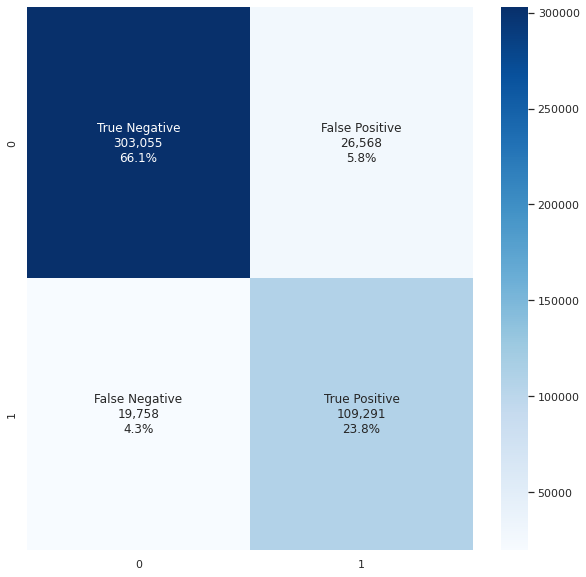

In [643]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=CLF_model.classes_)

sns.set(rc = {'figure.figsize':(10,10)})

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:,.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.1%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [335]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93    329623
           1       0.80      0.85      0.83    129049

    accuracy                           0.90    458672
   macro avg       0.87      0.88      0.88    458672
weighted avg       0.90      0.90      0.90    458672



In [336]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
1,0.639791,First_item_Unique_id_collection
70,0.071878,Price_USD_collection_cum_median
86,0.056046,Category_Art
68,0.037588,Price_Crypto_median_730d
71,0.011404,Price_USD_collection_cum_max
74,0.010039,p_resale
0,0.009899,nft_sales_count
10,0.009572,GoogleTrends_60d_rolling_avg
88,0.007569,Category_Games
73,0.006925,Price_Crypto_collection_cum_max


In [337]:
write_model_results_2(CLF_model, 'secondary2-49-xgboost-fill0-nobal-noscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale', 'secondary2-49-lightgbm-fill0-nobal-minmaxscale', 'secondary2-49-lightgbm-fillcustom-nobal-noscale', 'secondary2-49-lightgbm-fillcustom-nobal-minmaxscale', 'secondary2-49-xgboost-fill0-nobal-nosc

#### XGBoost - FillNA=0, Unbalanced, Scaled

In [338]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with zeroes'
balance_method = 'None'
scale_method = 'MinMaxScaler'

In [339]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 0)
print(len(X), len(y), len(indices))

2293360 2293360 2293360


In [340]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_scaled_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1834688 458672 1834688 458672 1834688 458672


In [341]:
%%time

# fit the model
# CLF_XGB = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
CLF_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 53min 28s, sys: 787 ms, total: 53min 29s
Wall time: 6min 48s


In [342]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.9018094629713608
test_acc_score:  0.8956029581051383
balanced_acc_score:  0.8796992889758748
f1_score:  0.8196771934052857
precision_score:  0.7973142266863008
recall_score:  0.8433308278250897
roc_auc_score:  0.8796992889758748


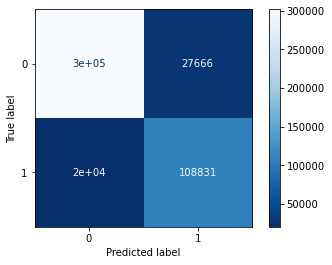

In [343]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [344]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93    329623
           1       0.80      0.84      0.82    129049

    accuracy                           0.90    458672
   macro avg       0.87      0.88      0.87    458672
weighted avg       0.90      0.90      0.90    458672



In [345]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
1,0.636220,First_item_Unique_id_collection
70,0.075281,Price_USD_collection_cum_median
86,0.064851,Category_Art
68,0.032657,Price_Crypto_median_730d
10,0.014116,GoogleTrends_60d_rolling_avg
74,0.009657,p_resale
71,0.009579,Price_USD_collection_cum_max
0,0.009117,nft_sales_count
64,0.007229,Price_Crypto_median_180d
73,0.006638,Price_Crypto_collection_cum_max


In [346]:
write_model_results_2(CLF_model, 'secondary2-49-xgboost-fill0-nobal-minmaxscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale', 'secondary2-49-lightgbm-fill0-nobal-minmaxscale', 'secondary2-49-lightgbm-fillcustom-nobal-noscale', 'secondary2-49-lightgbm-fillcustom-nobal-minmaxscale', 'secondary2-49-xgboost-fill0-nobal-nosc

#### XGBoost - FillNA=Custom, Unbalanced, Unscaled

In [374]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with custom method'
balance_method = 'None'
scale_method = 'None'

In [375]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 1)
print(len(X), len(y), len(indices))

2289248 2289248 2289248


In [376]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1831398 457850 1831398 457850 1831398 457850


In [377]:
%%time

# fit the model
# CLF_XGB = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
CLF_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 37min 6s, sys: 1.18 s, total: 37min 7s
Wall time: 4min 43s


In [378]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.9015566250481872
test_acc_score:  0.8989297804957955
balanced_acc_score:  0.8833576243701193
f1_score:  0.825228967991691
precision_score:  0.8038940110815962
recall_score:  0.8477272374567407
roc_auc_score:  0.8833576243701193


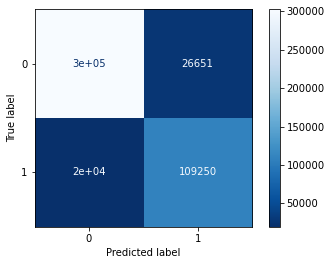

In [352]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [353]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93    328976
           1       0.80      0.85      0.83    128874

    accuracy                           0.90    457850
   macro avg       0.87      0.88      0.88    457850
weighted avg       0.90      0.90      0.90    457850



In [354]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
1,0.686759,First_item_Unique_id_collection
70,0.088860,Price_USD_collection_cum_median
75,0.019871,pca_1
88,0.016396,Category_Games
68,0.014806,Price_Crypto_median_730d
64,0.014611,Price_Crypto_median_180d
71,0.010455,Price_USD_collection_cum_max
74,0.008339,p_resale
0,0.008005,nft_sales_count
48,0.007172,Price_USD_median_180d


In [379]:
X_test.head(5)

,nft_sales_count,First_item_Unique_id_collection,GoogleTrends,BTC_price,ETH_price,MANA_price,WAX_price,GoogleTrends_7d_rolling_avg,GoogleTrends_14d_rolling_avg,GoogleTrends_30d_rolling_avg,...,deg_centrality_seller,pgrank_seller,trans_count_buyer,deg_centrality_buyer,pgrank_buyer,Category_Art,Category_Collectible,Category_Games,Category_Metaverse,Category_Other
955184,2,0,0,8783.1,188.36,0.0299,0.0267,0.000000,0.000000,0.000000,...,0.002845,8.899418e-07,22,0.000970,5.216978e-05,1,0,0,0,0
882982,2,0,0,11163.1,283.43,0.0593,0.0813,0.000000,0.000000,0.000000,...,0.003843,6.456454e-06,2,0.000008,7.669013e-07,1,0,0,0,0
953423,2,1,0,9036.8,188.99,0.0307,0.0296,0.000000,0.000000,0.000000,...,0.002845,8.899418e-07,219,0.001550,1.036322e-06,1,0,0,0,0
3051417,2,0,22,48963.6,2316.48,1.0943,0.1657,15.142857,15.857143,17.866667,...,0.001186,4.999383e-05,3,0.000572,8.361986e-06,0,1,0,0,0
2515057,3,0,3,52079.2,1847.95,0.2988,0.0748,2.142857,1.571429,1.266667,...,0.000008,8.763396e-07,1,0.000105,5.399616e-06,0,1,0,0,0


In [380]:
y_test.head(5)

955184     0
882982     0
953423     0
3051417    1
2515057    1
Name: Price_increase, dtype: int64

In [383]:
for col in df_collection_nft_second_2_50.columns:
    print(col, "---", df_collection_nft_second_2_50[col].loc[3051417])

Smart_contract --- atomicassets
ID_token --- 1099522182936
Transaction_hash --- nan
Seller_address --- ..uay.wam
Seller_username --- nan
Buyer_address --- waxatomicnft
Buyer_username --- nan
Image_url_1 --- QmVPgXaeByyYALrtJGE1VjBYc3UnHCjX2cvahBs5rjGifu/hero_voxels/front/1_common/36C.png
Image_url_2 --- https://ipfs.io/ipfs/QmVPgXaeByyYALrtJGE1VjBYc3UnHCjX2cvahBs5rjGifu/hero_voxels/front/1_common/36C.png
Image_url_3 --- https://ipfs.atomichub.io/ipfs/QmVPgXaeByyYALrtJGE1VjBYc3UnHCjX2cvahBs5rjGifu/hero_voxels/front/1_common/36C.png
Image_url_4 --- https://wax.atomichub.io/ipfs/QmVPgXaeByyYALrtJGE1VjBYc3UnHCjX2cvahBs5rjGifu/hero_voxels/front/1_common/36C.png
Price_Crypto --- 2.9
Crypto --- WAX
Price_USD --- 0.50605
Name --- nan
Description --- nan
Collection --- upland.cards
Market --- Atomic
Datetime_updated --- 2021-04-26 00:00:00
Datetime_updated_seconds --- 2021-04-26 16:27:04
Permanent_link --- nan
Unique_id_collection --- ('upland.cards', '1099522182936')
Collection_cleaned --- Upl

In [384]:
y.value_counts()

0    1644200
1     645048
Name: Price_increase, dtype: int64

In [355]:
write_model_results_2(CLF_model, 'secondary2-49-xgboost-fillcustom-nobal-noscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale', 'secondary2-49-lightgbm-fill0-nobal-minmaxscale', 'secondary2-49-lightgbm-fillcustom-nobal-noscale', 'secondary2-49-lightgbm-fillcustom-nobal-minmaxscale', 'secondary2-49-xgboost-fill0-nobal-nosc

#### XGBoost - FillNA=Custom, Unbalanced, Scaled

In [356]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with custom method'
balance_method = 'None'
scale_method = 'MinMaxScaler'

In [357]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 1)
print(len(X), len(y), len(indices))

2289248 2289248 2289248


In [358]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_scaled_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1831398 457850 1831398 457850 1831398 457850


In [359]:
%%time

# fit the model
# CLF_XGB = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
CLF_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
CLF_model.fit(X_train,y_train)

# predict test values
y_pred = CLF_model.predict(X_test)

CPU times: user 42min 2s, sys: 806 ms, total: 42min 2s
Wall time: 5min 20s


In [360]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.9015467964909867
test_acc_score:  0.8974489461614066
balanced_acc_score:  0.8827637338626811
f1_score:  0.8233674287025576
precision_score:  0.7990930930492373
recall_score:  0.8491627481105576
roc_auc_score:  0.8827637338626813


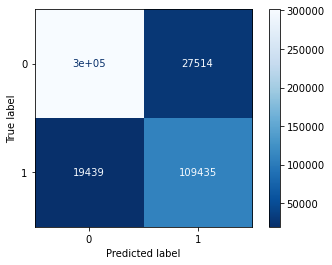

In [361]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [362]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93    328976
           1       0.80      0.85      0.82    128874

    accuracy                           0.90    457850
   macro avg       0.87      0.88      0.88    457850
weighted avg       0.90      0.90      0.90    457850



In [363]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
1,0.687536,First_item_Unique_id_collection
70,0.088274,Price_USD_collection_cum_median
75,0.020013,pca_1
88,0.016415,Category_Games
64,0.014628,Price_Crypto_median_180d
68,0.014226,Price_Crypto_median_730d
71,0.010466,Price_USD_collection_cum_max
74,0.008348,p_resale
0,0.008014,nft_sales_count
48,0.007180,Price_USD_median_180d


In [364]:
write_model_results_2(CLF_model, 'secondary2-49-xgboost-fillcustom-nobal-minmaxscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale', 'secondary2-49-lightgbm-fill0-nobal-minmaxscale', 'secondary2-49-lightgbm-fillcustom-nobal-noscale', 'secondary2-49-lightgbm-fillcustom-nobal-minmaxscale', 'secondary2-49-xgboost-fill0-nobal-nosc

#### CatBoost - FillNA=0, Unbalanced, Unscaled

In [455]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with zeroes'
balance_method = 'None'
scale_method = 'None'

In [456]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 0)
print(len(X), len(y), len(indices))

2293360 2293360 2293360


In [457]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1834688 458672 1834688 458672 1834688 458672


In [458]:
%%time

# fit the model
# Initialize CatBoostClassifier
CLF_model = CatBoostClassifier(iterations=50,
                           learning_rate=0.5,
                           random_seed=42,
                           custom_metric=['Accuracy', 'F1', 'AUC', 'BalancedAccuracy'] #, depth=2
                           )
# Fit model
CLF_model.fit(X_train, y_train)
# Get predicted classes
y_pred = CLF_model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = CLF_model.predict_proba(X_test)
# Get predicted RawFormulaVal
preds_raw = CLF_model.predict(X_test, prediction_type='RawFormulaVal')

0:	learn: 0.3046366	total: 267ms	remaining: 13.1s
1:	learn: 0.2713805	total: 542ms	remaining: 13s
2:	learn: 0.2633504	total: 814ms	remaining: 12.8s
3:	learn: 0.2588471	total: 1.04s	remaining: 11.9s
4:	learn: 0.2560876	total: 1.28s	remaining: 11.5s
5:	learn: 0.2513514	total: 1.54s	remaining: 11.3s
6:	learn: 0.2499659	total: 1.78s	remaining: 10.9s
7:	learn: 0.2482739	total: 1.99s	remaining: 10.5s
8:	learn: 0.2471122	total: 2.2s	remaining: 10s
9:	learn: 0.2452950	total: 2.42s	remaining: 9.67s
10:	learn: 0.2445839	total: 2.61s	remaining: 9.27s
11:	learn: 0.2435925	total: 2.84s	remaining: 9s
12:	learn: 0.2428409	total: 3.09s	remaining: 8.79s
13:	learn: 0.2422701	total: 3.3s	remaining: 8.48s
14:	learn: 0.2414166	total: 3.51s	remaining: 8.19s
15:	learn: 0.2407204	total: 3.75s	remaining: 7.96s
16:	learn: 0.2401735	total: 3.98s	remaining: 7.72s
17:	learn: 0.2394546	total: 4.21s	remaining: 7.49s
18:	learn: 0.2389851	total: 4.45s	remaining: 7.26s
19:	learn: 0.2384555	total: 4.7s	remaining: 7.05s


In [459]:
print(CLF_model.get_best_score())

{'learn': {'Accuracy': 0.892645507028988, 'F1': 0.8153248097572318, 'Logloss': 0.22779579551154502, 'BalancedAccuracy': 0.8774165833659943}}


In [460]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.892645507028988
test_acc_score:  0.8916262601597655
balanced_acc_score:  0.875774903849976
f1_score:  0.8134000030031384
precision_score:  0.7888509454706966
recall_score:  0.8395260714922239
roc_auc_score:  0.8757749038499761


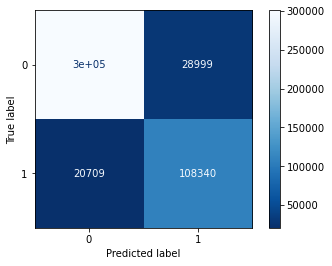

In [461]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [462]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92    329623
           1       0.79      0.84      0.81    129049

    accuracy                           0.89    458672
   macro avg       0.86      0.88      0.87    458672
weighted avg       0.89      0.89      0.89    458672



In [463]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
1,88.070092,First_item_Unique_id_collection
70,1.985440,Price_USD_collection_cum_median
0,1.525681,nft_sales_count
82,1.132048,pgrank_seller
74,0.985069,p_resale
75,0.520187,pca_1
81,0.517143,deg_centrality_seller
86,0.485716,Category_Art
62,0.454285,Price_Crypto_median_90d
72,0.412533,Price_Crypto_collection_cum_median


In [464]:
write_model_results_2(CLF_model, 'secondary2-49-catboost-fill0-nobal-noscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale', 'secondary2-49-lightgbm-fill0-nobal-minmaxscale', 'secondary2-49-lightgbm-fillcustom-nobal-noscale', 'secondary2-49-lightgbm-fillcustom-nobal-minmaxscale', 'secondary2-49-xgboost-fill0-nobal-nosc

#### CatBoost - FillNA=0, Unbalanced, Scaled

In [465]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with zeroes'
balance_method = 'None'
scale_method = 'MinMaxScaler'

In [466]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 0)
print(len(X), len(y), len(indices))

2293360 2293360 2293360


In [467]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_scaled_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1834688 458672 1834688 458672 1834688 458672


In [468]:
%%time

# fit the model
# Initialize CatBoostClassifier
CLF_model = CatBoostClassifier(iterations=50,
                           learning_rate=0.5,
                           random_seed=42,
                           custom_metric=['Accuracy', 'F1', 'AUC', 'BalancedAccuracy'] #, depth=2
                           )
# Fit model
CLF_model.fit(X_train, y_train)
# Get predicted classes
y_pred = CLF_model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = CLF_model.predict_proba(X_test)
# Get predicted RawFormulaVal
preds_raw = CLF_model.predict(X_test, prediction_type='RawFormulaVal')

0:	learn: 0.3046366	total: 260ms	remaining: 12.7s
1:	learn: 0.2714290	total: 533ms	remaining: 12.8s
2:	learn: 0.2633881	total: 806ms	remaining: 12.6s
3:	learn: 0.2588907	total: 1.03s	remaining: 11.8s
4:	learn: 0.2561359	total: 1.27s	remaining: 11.4s
5:	learn: 0.2536632	total: 1.53s	remaining: 11.2s
6:	learn: 0.2507248	total: 1.78s	remaining: 10.9s
7:	learn: 0.2489238	total: 1.99s	remaining: 10.4s
8:	learn: 0.2469241	total: 2.21s	remaining: 10.1s
9:	learn: 0.2460649	total: 2.43s	remaining: 9.71s
10:	learn: 0.2452018	total: 2.67s	remaining: 9.46s
11:	learn: 0.2438348	total: 2.87s	remaining: 9.09s
12:	learn: 0.2429561	total: 3.1s	remaining: 8.82s
13:	learn: 0.2421351	total: 3.33s	remaining: 8.56s
14:	learn: 0.2416332	total: 3.54s	remaining: 8.26s
15:	learn: 0.2408717	total: 3.76s	remaining: 7.99s
16:	learn: 0.2402524	total: 4s	remaining: 7.76s
17:	learn: 0.2394138	total: 4.23s	remaining: 7.53s
18:	learn: 0.2388689	total: 4.46s	remaining: 7.27s
19:	learn: 0.2381167	total: 4.67s	remaining: 

In [469]:
print(CLF_model.get_best_score())

{'learn': {'Accuracy': 0.8923936930965919, 'F1': 0.814814884296823, 'Logloss': 0.22839208058302632, 'BalancedAccuracy': 0.8769748063764811}}


In [470]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8923936930965919
test_acc_score:  0.8891473645655283
balanced_acc_score:  0.8730977306522091
f1_score:  0.8093672319349723
precision_score:  0.7840311473980881
recall_score:  0.8363954776867701
roc_auc_score:  0.8730977306522091


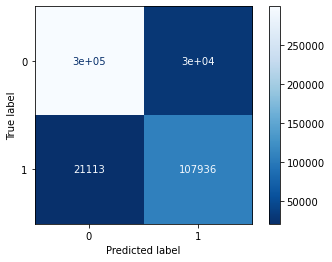

In [471]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [472]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92    329623
           1       0.78      0.84      0.81    129049

    accuracy                           0.89    458672
   macro avg       0.86      0.87      0.87    458672
weighted avg       0.89      0.89      0.89    458672



In [473]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
1,88.230085,First_item_Unique_id_collection
70,1.929395,Price_USD_collection_cum_median
0,1.342344,nft_sales_count
82,1.254401,pgrank_seller
74,0.975509,p_resale
81,0.667821,deg_centrality_seller
72,0.520474,Price_Crypto_collection_cum_median
86,0.491413,Category_Art
62,0.419307,Price_Crypto_median_90d
58,0.344487,Price_Crypto_median_30d


In [474]:
write_model_results_2(CLF_model, 'secondary2-49-catboost-fill0-nobal-minmaxscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale', 'secondary2-49-lightgbm-fill0-nobal-minmaxscale', 'secondary2-49-lightgbm-fillcustom-nobal-noscale', 'secondary2-49-lightgbm-fillcustom-nobal-minmaxscale', 'secondary2-49-xgboost-fill0-nobal-nosc

#### CatBoost - FillNA=Custom, Unbalanced, Unscaled

In [475]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with custom method'
balance_method = 'None'
scale_method = 'None'

In [476]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 1)
print(len(X), len(y), len(indices))

2289248 2289248 2289248


In [477]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1831398 457850 1831398 457850 1831398 457850


In [478]:
%%time

# fit the model
# Initialize CatBoostClassifier
CLF_model = CatBoostClassifier(iterations=50,
                           learning_rate=0.5,
                           random_seed=42,
                           custom_metric=['Accuracy', 'F1', 'AUC', 'BalancedAccuracy'] #, depth=2
                           )
# Fit model
CLF_model.fit(X_train, y_train)
# Get predicted classes
y_pred = CLF_model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = CLF_model.predict_proba(X_test)
# Get predicted RawFormulaVal
preds_raw = CLF_model.predict(X_test, prediction_type='RawFormulaVal')

0:	learn: 0.3030146	total: 273ms	remaining: 13.4s
1:	learn: 0.2760015	total: 508ms	remaining: 12.2s
2:	learn: 0.2588381	total: 773ms	remaining: 12.1s
3:	learn: 0.2550445	total: 987ms	remaining: 11.4s
4:	learn: 0.2527408	total: 1.22s	remaining: 11s
5:	learn: 0.2508579	total: 1.45s	remaining: 10.6s
6:	learn: 0.2495665	total: 1.65s	remaining: 10.1s
7:	learn: 0.2487830	total: 1.86s	remaining: 9.78s
8:	learn: 0.2476675	total: 2.12s	remaining: 9.64s
9:	learn: 0.2460656	total: 2.38s	remaining: 9.52s
10:	learn: 0.2451667	total: 2.59s	remaining: 9.18s
11:	learn: 0.2438535	total: 2.82s	remaining: 8.92s
12:	learn: 0.2430521	total: 3.04s	remaining: 8.64s
13:	learn: 0.2415239	total: 3.3s	remaining: 8.5s
14:	learn: 0.2404359	total: 3.53s	remaining: 8.24s
15:	learn: 0.2396992	total: 3.76s	remaining: 7.98s
16:	learn: 0.2391030	total: 4s	remaining: 7.76s
17:	learn: 0.2385650	total: 4.21s	remaining: 7.49s
18:	learn: 0.2379711	total: 4.4s	remaining: 7.18s
19:	learn: 0.2375330	total: 4.63s	remaining: 6.94

In [479]:
print(CLF_model.get_best_score())

{'learn': {'Accuracy': 0.8922063909647165, 'F1': 0.8150460527486899, 'Logloss': 0.22814135424459067, 'BalancedAccuracy': 0.8771650146101553}}


In [480]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8922063909647165
test_acc_score:  0.8913071966801354
balanced_acc_score:  0.8759364640003617
f1_score:  0.8132442179449171
precision_score:  0.7874662965035575
recall_score:  0.8407669506649906
roc_auc_score:  0.8759364640003617


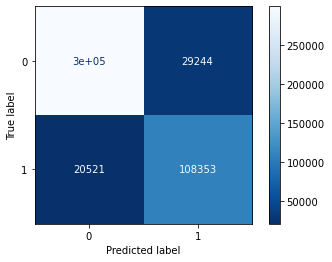

In [481]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [482]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92    328976
           1       0.79      0.84      0.81    128874

    accuracy                           0.89    457850
   macro avg       0.86      0.88      0.87    457850
weighted avg       0.89      0.89      0.89    457850



In [483]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
1,88.737648,First_item_Unique_id_collection
0,1.494486,nft_sales_count
82,1.207128,pgrank_seller
74,1.120726,p_resale
86,0.948059,Category_Art
70,0.839685,Price_USD_collection_cum_median
81,0.767935,deg_centrality_seller
71,0.487183,Price_USD_collection_cum_max
75,0.455715,pca_1
46,0.353578,Price_USD_median_90d


In [484]:
write_model_results_2(CLF_model, 'secondary2-49-catboost-fillcustom-nobal-noscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale', 'secondary2-49-lightgbm-fill0-nobal-minmaxscale', 'secondary2-49-lightgbm-fillcustom-nobal-noscale', 'secondary2-49-lightgbm-fillcustom-nobal-minmaxscale', 'secondary2-49-xgboost-fill0-nobal-nosc

#### CatBoost - FillNA=Custom, Unbalanced, Scaled

In [486]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with custom method'
balance_method = 'None'
scale_method = 'MinMaxScaler'

In [487]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 1)
print(len(X), len(y), len(indices))

2289248 2289248 2289248


In [488]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_scaled_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1831398 457850 1831398 457850 1831398 457850


In [489]:
%%time

# fit the model
# Initialize CatBoostClassifier
CLF_model = CatBoostClassifier(iterations=50,
                           learning_rate=0.5,
                           random_seed=42,
                           custom_metric=['Accuracy', 'F1', 'AUC', 'BalancedAccuracy'] #, depth=2
                           )
# Fit model
CLF_model.fit(X_train, y_train)
# Get predicted classes
y_pred = CLF_model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = CLF_model.predict_proba(X_test)
# Get predicted RawFormulaVal
preds_raw = CLF_model.predict(X_test, prediction_type='RawFormulaVal')

0:	learn: 0.3030146	total: 276ms	remaining: 13.5s
1:	learn: 0.2760015	total: 516ms	remaining: 12.4s
2:	learn: 0.2588381	total: 784ms	remaining: 12.3s
3:	learn: 0.2550445	total: 995ms	remaining: 11.4s
4:	learn: 0.2527408	total: 1.23s	remaining: 11.1s
5:	learn: 0.2508579	total: 1.45s	remaining: 10.6s
6:	learn: 0.2495665	total: 1.65s	remaining: 10.2s
7:	learn: 0.2487830	total: 1.87s	remaining: 9.8s
8:	learn: 0.2476675	total: 2.12s	remaining: 9.67s
9:	learn: 0.2460656	total: 2.39s	remaining: 9.56s
10:	learn: 0.2451667	total: 2.6s	remaining: 9.23s
11:	learn: 0.2438535	total: 2.83s	remaining: 8.96s
12:	learn: 0.2430521	total: 3.05s	remaining: 8.69s
13:	learn: 0.2415239	total: 3.32s	remaining: 8.54s
14:	learn: 0.2404359	total: 3.55s	remaining: 8.28s
15:	learn: 0.2396992	total: 3.77s	remaining: 8.01s
16:	learn: 0.2391030	total: 4.02s	remaining: 7.8s
17:	learn: 0.2385650	total: 4.23s	remaining: 7.52s
18:	learn: 0.2379711	total: 4.42s	remaining: 7.22s
19:	learn: 0.2375323	total: 4.71s	remaining:

In [490]:
print(CLF_model.get_best_score())

{'learn': {'Accuracy': 0.8921359529714459, 'F1': 0.8149485994353151, 'Logloss': 0.22817082494109267, 'BalancedAccuracy': 0.8771177390409405}}


In [491]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8921359529714459
test_acc_score:  0.8888391394561538
balanced_acc_score:  0.8717340484610442
f1_score:  0.8083014746040416
precision_score:  0.7853843845382481
recall_score:  0.8325961792138057
roc_auc_score:  0.8717340484610442


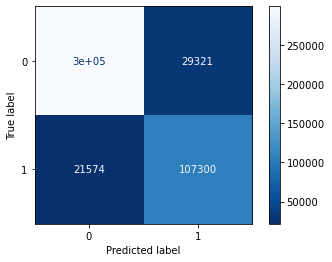

In [492]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [493]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92    328976
           1       0.79      0.83      0.81    128874

    accuracy                           0.89    457850
   macro avg       0.86      0.87      0.87    457850
weighted avg       0.89      0.89      0.89    457850



In [494]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
1,88.954319,First_item_Unique_id_collection
0,1.482913,nft_sales_count
82,1.211245,pgrank_seller
74,1.055959,p_resale
86,0.950540,Category_Art
70,0.832197,Price_USD_collection_cum_median
81,0.777374,deg_centrality_seller
71,0.490951,Price_USD_collection_cum_max
75,0.419424,pca_1
46,0.354494,Price_USD_median_90d


In [495]:
write_model_results_2(CLF_model, 'secondary2-49-catboost-fillcustom-nobal-minmaxscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale', 'secondary2-49-lightgbm-fill0-nobal-minmaxscale', 'secondary2-49-lightgbm-fillcustom-nobal-noscale', 'secondary2-49-lightgbm-fillcustom-nobal-minmaxscale', 'secondary2-49-xgboost-fill0-nobal-nosc

In [644]:
print(len(model_results_dict.keys()))

32


#### CatBoost - FillNA=0, Unbalanced, Scaled

In [465]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with zeroes'
balance_method = 'None'
scale_method = 'MinMaxScaler'

In [466]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 0)
print(len(X), len(y), len(indices))

2293360 2293360 2293360


In [467]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_scaled_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1834688 458672 1834688 458672 1834688 458672


In [468]:
%%time

# fit the model
# Initialize CatBoostClassifier
CLF_model = CatBoostClassifier(iterations=50,
                           learning_rate=0.5,
                           random_seed=42,
                           custom_metric=['Accuracy', 'F1', 'AUC', 'BalancedAccuracy'] #, depth=2
                           )
# Fit model
CLF_model.fit(X_train, y_train)
# Get predicted classes
y_pred = CLF_model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = CLF_model.predict_proba(X_test)
# Get predicted RawFormulaVal
preds_raw = CLF_model.predict(X_test, prediction_type='RawFormulaVal')

0:	learn: 0.3046366	total: 260ms	remaining: 12.7s
1:	learn: 0.2714290	total: 533ms	remaining: 12.8s
2:	learn: 0.2633881	total: 806ms	remaining: 12.6s
3:	learn: 0.2588907	total: 1.03s	remaining: 11.8s
4:	learn: 0.2561359	total: 1.27s	remaining: 11.4s
5:	learn: 0.2536632	total: 1.53s	remaining: 11.2s
6:	learn: 0.2507248	total: 1.78s	remaining: 10.9s
7:	learn: 0.2489238	total: 1.99s	remaining: 10.4s
8:	learn: 0.2469241	total: 2.21s	remaining: 10.1s
9:	learn: 0.2460649	total: 2.43s	remaining: 9.71s
10:	learn: 0.2452018	total: 2.67s	remaining: 9.46s
11:	learn: 0.2438348	total: 2.87s	remaining: 9.09s
12:	learn: 0.2429561	total: 3.1s	remaining: 8.82s
13:	learn: 0.2421351	total: 3.33s	remaining: 8.56s
14:	learn: 0.2416332	total: 3.54s	remaining: 8.26s
15:	learn: 0.2408717	total: 3.76s	remaining: 7.99s
16:	learn: 0.2402524	total: 4s	remaining: 7.76s
17:	learn: 0.2394138	total: 4.23s	remaining: 7.53s
18:	learn: 0.2388689	total: 4.46s	remaining: 7.27s
19:	learn: 0.2381167	total: 4.67s	remaining: 

In [469]:
print(CLF_model.get_best_score())

{'learn': {'Accuracy': 0.8923936930965919, 'F1': 0.814814884296823, 'Logloss': 0.22839208058302632, 'BalancedAccuracy': 0.8769748063764811}}


In [470]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8923936930965919
test_acc_score:  0.8891473645655283
balanced_acc_score:  0.8730977306522091
f1_score:  0.8093672319349723
precision_score:  0.7840311473980881
recall_score:  0.8363954776867701
roc_auc_score:  0.8730977306522091


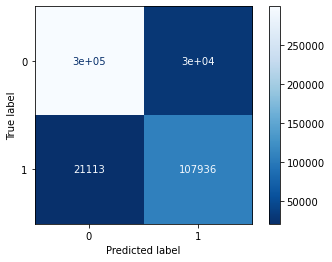

In [471]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [472]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92    329623
           1       0.78      0.84      0.81    129049

    accuracy                           0.89    458672
   macro avg       0.86      0.87      0.87    458672
weighted avg       0.89      0.89      0.89    458672



In [473]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
1,88.230085,First_item_Unique_id_collection
70,1.929395,Price_USD_collection_cum_median
0,1.342344,nft_sales_count
82,1.254401,pgrank_seller
74,0.975509,p_resale
81,0.667821,deg_centrality_seller
72,0.520474,Price_Crypto_collection_cum_median
86,0.491413,Category_Art
62,0.419307,Price_Crypto_median_90d
58,0.344487,Price_Crypto_median_30d


In [474]:
write_model_results_2(CLF_model, 'secondary2-49-catboost-fill0-nobal-minmaxscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale', 'secondary2-49-lightgbm-fill0-nobal-minmaxscale', 'secondary2-49-lightgbm-fillcustom-nobal-noscale', 'secondary2-49-lightgbm-fillcustom-nobal-minmaxscale', 'secondary2-49-xgboost-fill0-nobal-nosc

#### CatBoost - FillNA=Custom, Unbalanced, Unscaled

In [475]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with custom method'
balance_method = 'None'
scale_method = 'None'

In [476]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 1)
print(len(X), len(y), len(indices))

2289248 2289248 2289248


In [477]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1831398 457850 1831398 457850 1831398 457850


In [478]:
%%time

# fit the model
# Initialize CatBoostClassifier
CLF_model = CatBoostClassifier(iterations=50,
                           learning_rate=0.5,
                           random_seed=42,
                           custom_metric=['Accuracy', 'F1', 'AUC', 'BalancedAccuracy'] #, depth=2
                           )
# Fit model
CLF_model.fit(X_train, y_train)
# Get predicted classes
y_pred = CLF_model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = CLF_model.predict_proba(X_test)
# Get predicted RawFormulaVal
preds_raw = CLF_model.predict(X_test, prediction_type='RawFormulaVal')

0:	learn: 0.3030146	total: 273ms	remaining: 13.4s
1:	learn: 0.2760015	total: 508ms	remaining: 12.2s
2:	learn: 0.2588381	total: 773ms	remaining: 12.1s
3:	learn: 0.2550445	total: 987ms	remaining: 11.4s
4:	learn: 0.2527408	total: 1.22s	remaining: 11s
5:	learn: 0.2508579	total: 1.45s	remaining: 10.6s
6:	learn: 0.2495665	total: 1.65s	remaining: 10.1s
7:	learn: 0.2487830	total: 1.86s	remaining: 9.78s
8:	learn: 0.2476675	total: 2.12s	remaining: 9.64s
9:	learn: 0.2460656	total: 2.38s	remaining: 9.52s
10:	learn: 0.2451667	total: 2.59s	remaining: 9.18s
11:	learn: 0.2438535	total: 2.82s	remaining: 8.92s
12:	learn: 0.2430521	total: 3.04s	remaining: 8.64s
13:	learn: 0.2415239	total: 3.3s	remaining: 8.5s
14:	learn: 0.2404359	total: 3.53s	remaining: 8.24s
15:	learn: 0.2396992	total: 3.76s	remaining: 7.98s
16:	learn: 0.2391030	total: 4s	remaining: 7.76s
17:	learn: 0.2385650	total: 4.21s	remaining: 7.49s
18:	learn: 0.2379711	total: 4.4s	remaining: 7.18s
19:	learn: 0.2375330	total: 4.63s	remaining: 6.94

In [479]:
print(CLF_model.get_best_score())

{'learn': {'Accuracy': 0.8922063909647165, 'F1': 0.8150460527486899, 'Logloss': 0.22814135424459067, 'BalancedAccuracy': 0.8771650146101553}}


In [480]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8922063909647165
test_acc_score:  0.8913071966801354
balanced_acc_score:  0.8759364640003617
f1_score:  0.8132442179449171
precision_score:  0.7874662965035575
recall_score:  0.8407669506649906
roc_auc_score:  0.8759364640003617


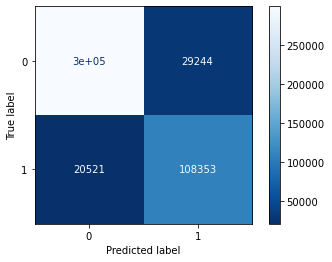

In [481]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [482]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92    328976
           1       0.79      0.84      0.81    128874

    accuracy                           0.89    457850
   macro avg       0.86      0.88      0.87    457850
weighted avg       0.89      0.89      0.89    457850



In [483]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
1,88.737648,First_item_Unique_id_collection
0,1.494486,nft_sales_count
82,1.207128,pgrank_seller
74,1.120726,p_resale
86,0.948059,Category_Art
70,0.839685,Price_USD_collection_cum_median
81,0.767935,deg_centrality_seller
71,0.487183,Price_USD_collection_cum_max
75,0.455715,pca_1
46,0.353578,Price_USD_median_90d


In [484]:
write_model_results_2(CLF_model, 'secondary2-49-catboost-fillcustom-nobal-noscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale', 'secondary2-49-lightgbm-fill0-nobal-minmaxscale', 'secondary2-49-lightgbm-fillcustom-nobal-noscale', 'secondary2-49-lightgbm-fillcustom-nobal-minmaxscale', 'secondary2-49-xgboost-fill0-nobal-nosc

#### CatBoost - FillNA=Custom, Unbalanced, Scaled

In [486]:
# model characteristics to record with results
model_scope = 'NFT sales 2-49'
# model_type = use CLF_model
fillna_method = 'Fill NaNs with custom method'
balance_method = 'None'
scale_method = 'MinMaxScaler'

In [487]:
X, y, indices = get_x_and_y(df_collection_nft_second_2_50, 1)
print(len(X), len(y), len(indices))

2289248 2289248 2289248


In [488]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_scaled_train_test_splits(X, y, indices)
print(len(X_train), len(X_test), len(y_train), len(y_test), len(indices_train), len(indices_test))

1831398 457850 1831398 457850 1831398 457850


In [489]:
%%time

# fit the model
# Initialize CatBoostClassifier
CLF_model = CatBoostClassifier(iterations=50,
                           learning_rate=0.5,
                           random_seed=42,
                           custom_metric=['Accuracy', 'F1', 'AUC', 'BalancedAccuracy'] #, depth=2
                           )
# Fit model
CLF_model.fit(X_train, y_train)
# Get predicted classes
y_pred = CLF_model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = CLF_model.predict_proba(X_test)
# Get predicted RawFormulaVal
preds_raw = CLF_model.predict(X_test, prediction_type='RawFormulaVal')

0:	learn: 0.3030146	total: 276ms	remaining: 13.5s
1:	learn: 0.2760015	total: 516ms	remaining: 12.4s
2:	learn: 0.2588381	total: 784ms	remaining: 12.3s
3:	learn: 0.2550445	total: 995ms	remaining: 11.4s
4:	learn: 0.2527408	total: 1.23s	remaining: 11.1s
5:	learn: 0.2508579	total: 1.45s	remaining: 10.6s
6:	learn: 0.2495665	total: 1.65s	remaining: 10.2s
7:	learn: 0.2487830	total: 1.87s	remaining: 9.8s
8:	learn: 0.2476675	total: 2.12s	remaining: 9.67s
9:	learn: 0.2460656	total: 2.39s	remaining: 9.56s
10:	learn: 0.2451667	total: 2.6s	remaining: 9.23s
11:	learn: 0.2438535	total: 2.83s	remaining: 8.96s
12:	learn: 0.2430521	total: 3.05s	remaining: 8.69s
13:	learn: 0.2415239	total: 3.32s	remaining: 8.54s
14:	learn: 0.2404359	total: 3.55s	remaining: 8.28s
15:	learn: 0.2396992	total: 3.77s	remaining: 8.01s
16:	learn: 0.2391030	total: 4.02s	remaining: 7.8s
17:	learn: 0.2385650	total: 4.23s	remaining: 7.52s
18:	learn: 0.2379711	total: 4.42s	remaining: 7.22s
19:	learn: 0.2375323	total: 4.71s	remaining:

In [490]:
print(CLF_model.get_best_score())

{'learn': {'Accuracy': 0.8921359529714459, 'F1': 0.8149485994353151, 'Logloss': 0.22817082494109267, 'BalancedAccuracy': 0.8771177390409405}}


In [491]:
train_acc_score, test_acc_score, bal_acc_score, clf_f1_score, clf_precision_score, clf_recall_score, clf_roc_auc_score = get_model_results(CLF_model, X_train, y_train, X_test, y_test, y_pred)
print("train_acc_score: ", train_acc_score)
print("test_acc_score: ", test_acc_score)
print("balanced_acc_score: ", bal_acc_score)
print("f1_score: ", clf_f1_score)
print("precision_score: ", clf_precision_score)
print("recall_score: ", clf_recall_score)
print("roc_auc_score: ", clf_roc_auc_score)

train_acc_score:  0.8921359529714459
test_acc_score:  0.8888391394561538
balanced_acc_score:  0.8717340484610442
f1_score:  0.8083014746040416
precision_score:  0.7853843845382481
recall_score:  0.8325961792138057
roc_auc_score:  0.8717340484610442


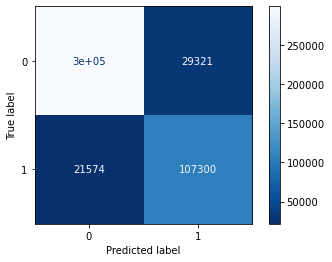

In [492]:
CLF_cm = plot_confusion_matrix(CLF_model,X_test,y_test,cmap='Blues_r')
CLF_cm

In [493]:
CLF_cr = classification_report(y_test,y_pred)
print(CLF_cr)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92    328976
           1       0.79      0.83      0.81    128874

    accuracy                           0.89    457850
   macro avg       0.86      0.87      0.87    457850
weighted avg       0.89      0.89      0.89    457850



In [494]:
pd.DataFrame({'Value':np.squeeze(CLF_model.feature_importances_),'Feature':X.columns}).sort_values(by="Value",ascending=False).head(15)

,Value,Feature
1,88.954319,First_item_Unique_id_collection
0,1.482913,nft_sales_count
82,1.211245,pgrank_seller
74,1.055959,p_resale
86,0.950540,Category_Art
70,0.832197,Price_USD_collection_cum_median
81,0.777374,deg_centrality_seller
71,0.490951,Price_USD_collection_cum_max
75,0.419424,pca_1
46,0.354494,Price_USD_median_90d


In [495]:
write_model_results_2(CLF_model, 'secondary2-49-catboost-fillcustom-nobal-minmaxscale')
model_results_dict.keys()

dict_keys(['secondary-logregr-fill0-nobal-noscale', 'secondary-logregr-fillcustom-nobal-noscale', 'secondary-logregr-fill0-nobal-minmaxscale', 'secondary-logregr-fillcustom-nobal-minmaxscale', 'secondary-lightgbm-fill0-nobal-noscale', 'secondary-lightgbm-fill0-nobal-minmaxscale', 'secondary-lightgbm-fillcustom-nobal-noscale', 'secondary-lightgbm-fillcustom-nobal-minmaxscale', 'secondary-xgboost-fill0-nobal-noscale', 'secondary-xgboost-fill0-nobal-minmaxscale', 'secondary-xgboost-fillcustom-nobal-noscale', 'secondary-xgboost-fillcustom-nobal-minmaxscale', 'secondary2-49-logregr-fill0-nobal-noscale', 'secondary2-49-logregr-fill0-nobal-minmaxscale', 'secondary2-49-logregr-fillcustom-nobal-noscale', 'secondary2-49-logregr-fillcustom-nobal-minmaxscale', 'secondary2-49-lightgbm-fill0-nobal-noscale', 'secondary2-49-lightgbm-fill0-nobal-minmaxscale', 'secondary2-49-lightgbm-fillcustom-nobal-noscale', 'secondary2-49-lightgbm-fillcustom-nobal-minmaxscale', 'secondary2-49-xgboost-fill0-nobal-nosc

### Analyze results

In [5]:
# # not needed
# import pickle
# import io
# import torch

# class CPU_Unpickler(pickle.Unpickler):
#     def find_class(self, module, name):
#         if module == 'torch.storage' and name == '_load_from_bytes':
#             return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
#         else: return super().find_class(module, name)

# file_path = 'df_model_results_tabnet.pkl'

# with open(file_path , 'rb') as f:
#     contents = CPU_Unpickler(f).load()

In [3]:
import pandas as pd
df_model_results_file = pd.read_pickle('https://storage.googleapis.com/nft_capstone_datafiles/df_model_results.pkl')
# temp_url = 'https://storage.cloud.google.com/nft_capstone_datafiles/df_model_results.pkl'

# with open(temp_url , 'rb') as f:
#     df_model_results_file = pickle.load(temp_url)

#     # df_model_results_file = pd.read_pickle(temp_url)

In [12]:
# import pickle
# pd.read_pickle('https://storage.cloud.google.com/nft_capstone_datafiles/df_model_results.pkl')
df_model_results_file.to_csv('df_model_classification_results.csv')

In [4]:
print(len(df_model_results_file))

40


In [6]:
# print(len(contents))
# print(contents.columns)
# contents.head()

In [7]:
print(len(df_model_results_file))
print(df_model_results_file.columns)
# print(df_model_results_file.columns == contents.columns)
df_model_results_file.head()

40
Index(['unique_model_name', 'model_scope', 'model_type', 'balance_method',
       'scale_method', 'train_acc_score', 'test_acc_score',
       'balance_acc_score', 'f1_score', 'precision_score', 'recall_score',
       'roc_auc_score', 'confusion_matrix', 'classification_report',
       'features', 'coef_values', 'date_recorded'],
      dtype='object')


,unique_model_name,model_scope,model_type,balance_method,scale_method,train_acc_score,test_acc_score,balance_acc_score,f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix,classification_report,features,coef_values,date_recorded
0,secondary-logregr-fill0-nobal-noscale,NFT secondary sales,LogisticRegression(),None,None,0.740812,0.740861,0.74297,0.743129,0.703716,0.787219,0.74297,<sklearn.metrics._plot.confusion_matrix.Confus...,precision recall f1-score ...,"Index(['nft_sales_count', 'First_item_Unique_i...","[-0.00011092048813094341, 0.0, -5.432995915618...",2022-04-05-02:40:03
1,secondary-logregr-fillcustom-nobal-noscale,NFT secondary sales,LogisticRegression(),None,None,0.740838,0.740211,0.742014,0.741559,0.705676,0.781287,0.742014,<sklearn.metrics._plot.confusion_matrix.Confus...,precision recall f1-score ...,"Index(['nft_sales_count', 'First_item_Unique_i...","[-7.307570248403485e-05, 0.0, -4.7352531896134...",2022-04-05-02:53:33
2,secondary-logregr-fill0-nobal-minmaxscale,NFT secondary sales,LogisticRegression(),None,MinMaxScaler,0.76255,0.763438,0.765601,0.765521,0.724886,0.810983,0.765601,<sklearn.metrics._plot.confusion_matrix.Confus...,precision recall f1-score ...,"Index(['nft_sales_count', 'First_item_Unique_i...","[-7.120567329091572, 0.0, -0.3070797094569054,...",2022-04-05-03:15:37
3,secondary-logregr-fillcustom-nobal-minmaxscale,NFT secondary sales,LogisticRegression(),None,MinMaxScaler,0.763146,0.763667,0.765898,0.766806,0.724378,0.814512,0.765898,<sklearn.metrics._plot.confusion_matrix.Confus...,precision recall f1-score ...,"Index(['nft_sales_count', 'First_item_Unique_i...","[-5.746898921650653, 0.0, -0.5322465729583994,...",2022-04-05-03:20:46
4,secondary-lightgbm-fill0-nobal-noscale,NFT secondary sales,LGBMClassifier(),None,None,0.814194,0.813561,0.814446,0.809707,0.787663,0.83302,0.814446,<sklearn.metrics._plot.confusion_matrix.Confus...,precision recall f1-score ...,"Index(['nft_sales_count', 'First_item_Unique_i...","[190, 0, 3, 36, 45, 41, 14, 12, 7, 18, 11, 2, ...",2022-04-05-03:49:33


In [8]:
# print(len(contents.columns))
# print(len(df_model_results_file.columns))

In [9]:
# for col in df_model_results_file.columns:
#     if col not in contents.columns:
#         print(col)
#     else: pass

In [10]:
# contents['train_acc_score'] = np.NaN
# contents['test_acc_score'] = np.NaN
# contents['confusion_matrix'] = np.NaN

In [11]:
# print(type(contents))
# print(type(df_model_results_file))

In [12]:
# df_model_results_from_files = pd.concat([df_model_results_file, contents], axis=0)
# print(len(df_model_results_from_files))
# # print(df_model_results_from_files.head())
# # print(df_model_results_from_files.tail())

In [13]:
# df_model_results_from_files

In [14]:
# df_model_results_from_files.to_pickle('df_model_results.pkl')

In [15]:
# df_model_results_from_files2 = df_model_results_from_files.explode(['features', 'coef_values'])
# print(len(df_model_results_from_files2))
# df_model_results_from_files2.head()

In [16]:
# df_model_results_from_files2.to_csv('df_model_results_exploded.csv')

In [17]:
# df_model_results = pd.DataFrame(model_results_dict).transpose().reset_index().rename(columns={'index':'unique_model_name'})
# print(len(df_model_results))
# df_model_results.head()

In [498]:
# df_model_results.to_pickle('df_model_results.pkl')

In [499]:
df_all_values['First_item_Collection_cleaned'].value_counts()

0    6066403
1       4624
Name: First_item_Collection_cleaned, dtype: int64

In [500]:
df_all_values['First_item_Unique_id_collection'].value_counts()

1    4678242
0    1392785
Name: First_item_Unique_id_collection, dtype: int64

In [504]:
ranges = [0, 1, 49, np.inf]  # np.inf for infinity
labels = ['1', '2-49', '50+']
df_all_values['model_category'] = pd.cut(df_all_values['nft_sales_count'], 
                                  bins=ranges, 
                                  labels=labels)
df_all_values['model_category'].value_counts()

1       3710713
2-49    2293360
50+       66954
Name: model_category, dtype: int64

In [575]:
df_all_values['model_category2'] = np.where(df_all_values['model_category'] == '1', '1 sale only', np.where(df_all_values['Price_increase'] == 0, 
                                                                                                            '2+ sales, no price increase', '2+ sales, price increase'))
df_all_values['model_category2'].value_counts()

1 sale only                    3710713
2+ sales, no price increase    1697605
2+ sales, price increase        662709
Name: model_category2, dtype: int64

In [505]:
df_all_values['Category'].value_counts()

Games          2643014
Collectible    1605657
Art            1472515
Other           272772
Metaverse        68372
Utility           8697
Name: Category, dtype: int64

In [576]:
df_group1 = df_all_values.groupby(df_all_values['Category'])['Category'].count()
df_group2 = df_all_values.groupby(['First_item_Collection_cleaned'])['First_item_Collection_cleaned'].count()
df_group3 = df_all_values.groupby(['First_item_Unique_id_collection'])['First_item_Unique_id_collection'].count()
df_group4 = df_all_values.groupby(['model_category'])['model_category'].count()
df_group5 = df_all_values.groupby(['model_category2'])['model_category2'].count()
print(type(df_group1), type(df_group2), type(df_group3), type(df_group4), type(df_group4))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [577]:
series_list = [df_group1, df_group2, df_group3, df_group4, df_group5]
sname_list = ['By Category', 'By Collection', 'By NFT', 'By Model Category', 'By Price Increase']

df_chart = pd.concat(series_list, axis=0, keys=sname_list).reset_index()  # columns=['Category1', 'Category2', 'Value']
df_chart2 = df_chart.rename(columns={'level_0':'Category1', 'level_1':'Category2', 0:'Value'})
df_chart2

,Category1,Category2,Value
0,By Category,Art,1472515
1,By Category,Collectible,1605657
2,By Category,Games,2643014
3,By Category,Metaverse,68372
4,By Category,Other,272772
5,By Category,Utility,8697
6,By Collection,0,6066403
7,By Collection,1,4624
8,By NFT,0,1392785
9,By NFT,1,4678242


In [578]:
df_chart2['Category2'].loc[6] = 'Secondary sales within Collection'
df_chart2['Category2'].loc[7] = 'Primary sales within Collection'
df_chart2['Category2'].loc[8] = 'Secondary sales of NFTs'
df_chart2['Category2'].loc[9] = 'Primary sales of NFTs'
df_chart2['Category2'].loc[10] = 'NFTs with 1 sale'
df_chart2['Category2'].loc[11] = 'NFTs with 2-49 sales'
df_chart2['Category2'].loc[12] = 'NFTs with 50+ sales'
df_chart2

,Category1,Category2,Value
0,By Category,Art,1472515
1,By Category,Collectible,1605657
2,By Category,Games,2643014
3,By Category,Metaverse,68372
4,By Category,Other,272772
5,By Category,Utility,8697
6,By Collection,Secondary sales within Collection,6066403
7,By Collection,Primary sales within Collection,4624
8,By NFT,Secondary sales of NFTs,1392785
9,By NFT,Primary sales of NFTs,4678242


In [625]:
df_chart2.to_csv('df_chart_data.csv')

In [630]:
df_all_values.groupby(['model_category'])['Unique_id_collection'].count()

model_category
1       3710713
2-49    2293360
50+       66954
Name: Unique_id_collection, dtype: int64

In [632]:
df_all_values.groupby(['model_category'])['Price_increase'].value_counts()

model_category  Price_increase
1               0                 3710713
2-49            0                 1648312
                1                  645048
50+             0                   49293
                1                   17661
Name: Price_increase, dtype: int64

In [627]:
df_all_values.groupby(['model_category'])['Unique_id_collection'].nunique()

model_category
1       3710713
2-49     967153
50+         376
Name: Unique_id_collection, dtype: int64

In [629]:
df_all_values.groupby(['model_category'])['ID_token'].nunique()

model_category
1       3474633
2-49     934611
50+         229
Name: ID_token, dtype: int64

In [590]:
import altair as alt
from altair import datum

source = df_chart2

selection = alt.selection_single()

base = alt.Chart(source).mark_bar().encode(
    x=alt.X('Category1', stack="normalize"),
    y=alt.Y('Value', axis=alt.Axis(title="NFT Transactions")),
    color=alt.condition(selection, 'Category2', alt.value('light grey'), scale=alt.Scale(scheme = 'category20')),
    order=alt.Order(
      # Sort the segments of the bars by this field
      'Category2',
      sort='ascending'), 
    tooltip = [alt.Tooltip('Category1:N'),
               alt.Tooltip('Category2:N'),
               alt.Tooltip('Value:N')
              ]
).properties(
    width=100,
    height=300
).add_selection(selection)

# text = base.mark_text(
#     # align='left',
#     # baseline='middle',
#     # dx=3  # Nudges text to right so it doesn't appear on top of the bar
# ).encode(
#     text='Value:Q'
# )

chart = alt.hconcat()
for Category1 in ['By Category', 'By Collection', 'By NFT', 'By Model Category', 'By Price Increase']:
    chart |= base.transform_filter(datum.Category1 == Category1)
chart

# display(base.resolve_scale(y='shared'))

alt.HConcatChart(...)

In [591]:
source = df_chart2

base = alt.Chart(source).mark_bar().encode(
    x=alt.X('Category1', stack="normalize"),
    y=alt.Y('Value', axis=alt.Axis(title="NFT Transactions")),
    color='Category2',
    order=alt.Order(
      # Sort the segments of the bars by this field
      'Category2',
      sort='ascending')
).properties(
    width=100,
    height=300
).facet(
    column='Category1:N'
)

text = base.mark_text(
    # align='left',
    # baseline='middle',
    # dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Value:Q'
)

base + text

AttributeError: 'FacetChart' object has no attribute 'mark_text'

In [548]:
df_model_results.columns

Index(['unique_model_name', 'model_scope', 'model_type', 'balance_method',
       'scale_method', 'train_acc_score', 'test_acc_score',
       'balance_acc_score', 'f1_score', 'precision_score', 'recall_score',
       'roc_auc_score', 'confusion_matrix', 'classification_report',
       'features', 'coef_values', 'date_recorded'],
      dtype='object')

In [549]:
df_model_results_display = df_model_results[['unique_model_name', 'model_scope', 'model_type', 'scale_method', 'test_acc_score','f1_score', 'roc_auc_score']]
df_model_results_display

,unique_model_name,model_scope,model_type,scale_method,test_acc_score,f1_score,roc_auc_score
0,secondary-logregr-fill0-nobal-noscale,NFT secondary sales,LogisticRegression(),None,0.740861,0.743129,0.74297
1,secondary-logregr-fillcustom-nobal-noscale,NFT secondary sales,LogisticRegression(),None,0.740211,0.741559,0.742014
2,secondary-logregr-fill0-nobal-minmaxscale,NFT secondary sales,LogisticRegression(),MinMaxScaler,0.763438,0.765521,0.765601
3,secondary-logregr-fillcustom-nobal-minmaxscale,NFT secondary sales,LogisticRegression(),MinMaxScaler,0.763667,0.766806,0.765898
4,secondary-lightgbm-fill0-nobal-noscale,NFT secondary sales,LGBMClassifier(),None,0.813561,0.809707,0.814446
5,secondary-lightgbm-fill0-nobal-minmaxscale,NFT secondary sales,LGBMClassifier(),MinMaxScaler,0.810656,0.809186,0.812135
6,secondary-lightgbm-fillcustom-nobal-noscale,NFT secondary sales,LGBMClassifier(),None,0.813456,0.809804,0.81429
7,secondary-lightgbm-fillcustom-nobal-minmaxscale,NFT secondary sales,LGBMClassifier(),MinMaxScaler,0.809926,0.810156,0.811691
8,secondary-xgboost-fill0-nobal-noscale,NFT secondary sales,"XGBClassifier(base_score=0.5, booster='gbtree'...",None,0.823824,0.819023,0.824433
9,secondary-xgboost-fill0-nobal-minmaxscale,NFT secondary sales,"XGBClassifier(base_score=0.5, booster='gbtree'...",MinMaxScaler,0.819588,0.817328,0.820864


In [ ]:
alt.Chart(source).mark_bar().encode(
    x='wheat:Q',
    y="year:O"
).properties(height=700)

In [565]:
source = df_model_results_display[['unique_model_name', 'model_scope', 'scale_method', 'test_acc_score']]

base = alt.Chart(source).mark_bar().encode(
    x=alt.X('test_acc_score:Q', title="Accuracy", scale=alt.Scale(zero=False)),
    y=alt.Y('unique_model_name:N', title="Model", sort='-x'),
    order=alt.Order(
      # Sort the segments of the bars by this field
      'test_acc_score:Q',
      sort='ascending')
).properties(
    width=500,
    height=600
)
base

# chart = alt.hconcat()
# for Category1 in ['By Category', 'By Collection', 'By NFT', 'By Model Category']:
#     chart |= base.transform_filter(datum.Category1 == Category1)
# chart

alt.Chart(...)